In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

# Read

In [2]:
import pandas as pd
df = pd.read_csv('read_me.csv')
df.head()

Unnamed: 0                  Признак  \
0           0                iat_0...9   
1           1          direction_0...9   
2           2            pkt_len_0...9   
3           3      payload_bytes_0...9   
4           4  flow_packets_per_second   

                                            Описание  
0    Последовательность межпакетных интервалов 0...9  
1                 Направления передачи пакетов 0...9  
2                                Длины пакетов 0...9  
3  Последовательности байт информационных частей ...  
4                     Скорость передачи данных Б/сек

In [3]:
df['Описание'][3]

'Последовательности байт информационных частей пакетов 0...9'

# All data

In [180]:
data_1 = pd.read_csv('dataset_1.csv',index_col='Unnamed: 0')
data_2 = pd.read_csv('dataset_2.csv',index_col='Unnamed: 0')
data_all = pd.read_csv('dataset_all.csv',index_col='Unnamed: 0')

In [181]:
data_11 = pd.concat([data_1,data_2,data_all], ignore_index=True)

In [182]:
data_11 = data_11.drop('iat_0', axis=1)

In [35]:
data_1 = pd.read_csv('dataset_1.csv',index_col='Unnamed: 0')
data_2 = pd.read_csv('dataset_2.csv',index_col='Unnamed: 0')

In [36]:
data_11 = pd.concat([data_1,data_2], ignore_index=True)

In [37]:
data_11 = data_11.drop('iat_0', axis=1)

In [130]:
data_all = pd.read_csv('dataset_all.csv',index_col='Unnamed: 0')

In [88]:
data_11 = pd.concat([data_1,data_2,data_all], ignore_index=True)

In [132]:
data_11 = data_all.drop('iat_0', axis=1)

### Извлечение полезной информации путем декодирования из 16 -> 10

In [183]:
for i in range(10):
    data_11[f'p_{i}'] = 0
for i in range(10):
    data_11[f'payload_bytes_{i}'] = data_11[f'payload_bytes_{i}'].astype('str')
for i in range(data_11.shape[0]):
    sum = 0
    for j in range(10):
        for s in data_11[f'payload_bytes_{j}'].values[i]:
            if s == '1' or s == '2' or s == '3' or s == '4' or s == '5' or s == '6' or s == '7' or s == '8' or s == '9':
                sum += int(s)
            elif s == 'a' and data_11[f'payload_bytes_{j}'].values[i] != 'nan':
                sum += 10
            elif s == 'b':
                sum += 11
            elif s == 'c':
                sum += 12
            elif s == 'd':
                sum += 13
            elif s == 'e':
                sum += 14
            elif s == 'f':
                sum += 15
        data_11[f'p_{j}'].values[i] = sum

In [184]:
for i in range(10):
    data_11.drop(columns = [f'payload_bytes_{i}'], inplace = True)

In [185]:
data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1           -1           -1   
1     0.006289     0.007581  0.115450            1           -1           -1   
2     0.001306     0.063449  0.000004            1           -1            1   
3     0.052732     0.002085  0.248956            1           -1           -1   
4     0.010099     0.042989  0.000043            1           -1           -1   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1           -1           -1   
3992  0.041867     5.391821  0.042908            1            1           -1   
3993  0.319249  1109.746278  0.583709            1           -1            1   
3994  0.019090     0.032696  0.004415            1           -1            1   
3995  0.086543     2.546980  0.060018            1           -1            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0              -1           -1           -1            1            1   
1              -1            1           -1           -1            1   
2              -1            1           -1            1            1   
3              -1           -1           -1            1           -1   
4              -1           -1           -1            1            1   
...           ...          ...          ...          ...          ...   
3991           -1           -1           -1            1            1   
3992            1           -1            1            1           -1   
3993           -1           -1            1            1           -1   
3994            1           -1            1           -1            1   
3995           -1            1           -1            1           -1   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2              -1           -1        101        207        101        207   
3               1            1       1420       1420        678         90   
4              -1           -1       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991           -1            1         87        488         32         32   
3992            1           -1        114        114         77        114   
3993            1           -1        112        318        112        318   
3994           -1            1       1132        174        527        129   
3995            1           -1        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

### Обработка направлений

In [186]:
columns = ['direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9']
dict = {1: 1, -1: 0}

for col in columns:
    data_11[col] = data_11[col].replace(dict)

In [187]:
data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1            0            0   
1     0.006289     0.007581  0.115450            1            0            0   
2     0.001306     0.063449  0.000004            1            0            1   
3     0.052732     0.002085  0.248956            1            0            0   
4     0.010099     0.042989  0.000043            1            0            0   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1            0            0   
3992  0.041867     5.391821  0.042908            1            1            0   
3993  0.319249  1109.746278  0.583709            1            0            1   
3994  0.019090     0.032696  0.004415            1            0            1   
3995  0.086543     2.546980  0.060018            1            0            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0               0            0            0            1            1   
1               0            1            0            0            1   
2               0            1            0            1            1   
3               0            0            0            1            0   
4               0            0            0            1            1   
...           ...          ...          ...          ...          ...   
3991            0            0            0            1            1   
3992            1            0            1            1            0   
3993            0            0            1            1            0   
3994            1            0            1            0            1   
3995            0            1            0            1            0   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2               0            0        101        207        101        207   
3               1            1       1420       1420        678         90   
4               0            0       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991            0            1         87        488         32         32   
3992            1            0        114        114         77        114   
3993            1            0        112        318        112        318   
3994            0            1       1132        174        527        129   
3995            1            0        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

### Суммарная длинна полученных и отправленных

In [188]:
columns1 = ['pkt_len_0', 'pkt_len_1', 'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 
           'pkt_len_5', 'pkt_len_6', 'pkt_len_7', 'pkt_len_8', 'pkt_len_9']

columns2 = ['direction_0', 'direction_1', 'direction_2', 'direction_3','direction_4',
            'direction_5', 'direction_6', 'direction_7','direction_8', 'direction_9']

data_11['Sum'] = 0
data_11['sent'] = 0

for col in columns1:
    data_11['Sum'] = data_11['Sum'] + data_11[col]

for i in range(len(columns1)):
    data_11['sent'] = data_11['sent'] + data_11[columns1[i]]*data_11[columns2[i]]

data_11['get'] = data_11['Sum'] - data_11['sent']

data_11.drop(columns=['Sum'], inplace=True)

data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1            0            0   
1     0.006289     0.007581  0.115450            1            0            0   
2     0.001306     0.063449  0.000004            1            0            1   
3     0.052732     0.002085  0.248956            1            0            0   
4     0.010099     0.042989  0.000043            1            0            0   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1            0            0   
3992  0.041867     5.391821  0.042908            1            1            0   
3993  0.319249  1109.746278  0.583709            1            0            1   
3994  0.019090     0.032696  0.004415            1            0            1   
3995  0.086543     2.546980  0.060018            1            0            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0               0            0            0            1            1   
1               0            1            0            0            1   
2               0            1            0            1            1   
3               0            0            0            1            0   
4               0            0            0            1            1   
...           ...          ...          ...          ...          ...   
3991            0            0            0            1            1   
3992            1            0            1            1            0   
3993            0            0            1            1            0   
3994            1            0            1            0            1   
3995            0            1            0            1            0   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2               0            0        101        207        101        207   
3               1            1       1420       1420        678         90   
4               0            0       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991            0            1         87        488         32         32   
3992            1            0        114        114         77        114   
3993            1            0        112        318        112        318   
3994            0            1       1132        174        527        129   
3995            1            0        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

### Суммарное время

In [189]:
columns1 = ['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8', 'iat_9']

columns2 = ['direction_1', 'direction_2', 'direction_3','direction_4',
            'direction_5', 'direction_6', 'direction_7','direction_8', 'direction_9']

data_11['Sum'] = 0
data_11['sent_time'] = 0

for col in columns1:
    data_11['Sum'] = data_11['Sum'] + data_11[col]

for i in range(len(columns1)):
    data_11['sent_time'] = data_11['sent_time'] + data_11[columns1[i]]*data_11[columns2[i]]

data_11['get_time'] = data_11['Sum'] - data_11['sent_time']

data_11.drop(columns=['Sum'], inplace=True)

data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1            0            0   
1     0.006289     0.007581  0.115450            1            0            0   
2     0.001306     0.063449  0.000004            1            0            1   
3     0.052732     0.002085  0.248956            1            0            0   
4     0.010099     0.042989  0.000043            1            0            0   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1            0            0   
3992  0.041867     5.391821  0.042908            1            1            0   
3993  0.319249  1109.746278  0.583709            1            0            1   
3994  0.019090     0.032696  0.004415            1            0            1   
3995  0.086543     2.546980  0.060018            1            0            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0               0            0            0            1            1   
1               0            1            0            0            1   
2               0            1            0            1            1   
3               0            0            0            1            0   
4               0            0            0            1            1   
...           ...          ...          ...          ...          ...   
3991            0            0            0            1            1   
3992            1            0            1            1            0   
3993            0            0            1            1            0   
3994            1            0            1            0            1   
3995            0            1            0            1            0   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2               0            0        101        207        101        207   
3               1            1       1420       1420        678         90   
4               0            0       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991            0            1         87        488         32         32   
3992            1            0        114        114         77        114   
3993            1            0        112        318        112        318   
3994            0            1       1132        174        527        129   
3995            1            0        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

### Суммарная информация

In [190]:
columns1 = ['p_0', 'p_1','p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9']

columns2 = ['direction_0','direction_1', 'direction_2', 'direction_3','direction_4',
            'direction_5', 'direction_6', 'direction_7','direction_8', 'direction_9']

data_11['Sum'] = 0
data_11['sent_data'] = 0

for col in columns1:
    data_11['Sum'] = data_11['Sum'] + data_11[col]

for i in range(len(columns1)):
    data_11['sent_data'] = data_11['sent_data'] + data_11[columns1[i]]*data_11[columns2[i]]

data_11['get_data'] = data_11['Sum'] - data_11['sent_data']

data_11.drop(columns=['Sum'], inplace=True)

data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1            0            0   
1     0.006289     0.007581  0.115450            1            0            0   
2     0.001306     0.063449  0.000004            1            0            1   
3     0.052732     0.002085  0.248956            1            0            0   
4     0.010099     0.042989  0.000043            1            0            0   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1            0            0   
3992  0.041867     5.391821  0.042908            1            1            0   
3993  0.319249  1109.746278  0.583709            1            0            1   
3994  0.019090     0.032696  0.004415            1            0            1   
3995  0.086543     2.546980  0.060018            1            0            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0               0            0            0            1            1   
1               0            1            0            0            1   
2               0            1            0            1            1   
3               0            0            0            1            0   
4               0            0            0            1            1   
...           ...          ...          ...          ...          ...   
3991            0            0            0            1            1   
3992            1            0            1            1            0   
3993            0            0            1            1            0   
3994            1            0            1            0            1   
3995            0            1            0            1            0   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2               0            0        101        207        101        207   
3               1            1       1420       1420        678         90   
4               0            0       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991            0            1         87        488         32         32   
3992            1            0        114        114         77        114   
3993            1            0        112        318        112        318   
3994            0            1       1132        174        527        129   
3995            1            0        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

# Visual

In [45]:
columns1= ['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8',
       'iat_9']
columns2= ['direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9']
columns3= ['pkt_len_0', 'pkt_len_1', 'pkt_len_2',
       'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7',
       'pkt_len_8', 'pkt_len_9']
columns4= ['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9']
columns5= ['flow_packets_per_second', 'sent', 'get', 'sent_time', 'get_time', 'sent_data', 'get_data']

### Sort

In [1]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns1):
    plt.subplot(10,1,i+1)
    a = data_11[c]
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(a.sort_values().values)
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [2]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns2):
    plt.subplot(10,1,i+1)
    a = data_11[c]
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(a.sort_values().values)
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [3]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns3):
    plt.subplot(10,1,i+1)
    a = data_11[c]
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(a.sort_values().values)
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [4]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns4):
    plt.subplot(10,1,i+1)
    a = data_11[c]
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(a.sort_values().values)
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [5]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns5):
    plt.subplot(10,1,i+1)
    a = data_11[c]
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(a.sort_values().values)
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

### Not sort

In [6]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns1):
    plt.subplot(10,1,i+1)
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(data_11[c])
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [7]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns2):
    plt.subplot(10,1,i+1)
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(data_11[c])
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [8]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns3):
    plt.subplot(10,1,i+1)
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(data_11[c])
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [9]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns4):
    plt.subplot(10,1,i+1)
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(data_11[c])
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

In [10]:
plt.figure(figsize=(30,200))
for i,c in enumerate(columns5):
    plt.subplot(10,1,i+1)
    #sns.histplot(y=a.sort_values().values,x=data_11.shape[0])
    plt.plot(data_11[c])
    #sns.boxplot(y=data_11[c],x=data_11.shape[0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

# Params

по сортировкам выделяется (2)-3-4-(5) класса

In [ ]:
clases = 3

Гипотеза: "iat_" and "direction_" не влияют на разделение пока не просуммированы, следовательно удаляем столбцы 0-20

In [191]:
data_11 = data_11.drop(columns=['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8',
       'iat_9', 'direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9'], axis=1)

# Model

In [57]:
from sklearn.cluster import KMeans

In [58]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Scaler

In [144]:
data_11.shape

(3996, 27)

In [61]:
n_init = 100

In [ ]:
X_scaled = data_11

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(data_11)

In [22]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(data_11)

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [148]:
scaler = KBinsDiscretizer(n_bins=[2,2,2,2,2,2,2,2,2,2,
                                             2,3,3,3,3,3,3,3,3,2,
                                             3,2,3,3,2,2,3], encode='ordinal')
X_scaled=scaler.fit_transform(data_11)

### Models

In [149]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    
    print("-"*100)

Score for number of cluster(s) 2: -23156.708351693524
Silhouette score for number of cluster(s) 2: 0.4165437081745086
Davies Bouldin score for number of cluster(s) 2: 0.9289557651827438
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -16698.039171188524
Silhouette score for number of cluster(s) 3: 0.3721093073004387
Davies Bouldin score for number of cluster(s) 3: 1.2235493661576717
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -14320.030441704026
Silhouette score for number of cluster(s) 4: 0.3843736351163497
Davies Bouldin score for number of cluster(s) 4: 1.3228890174091212
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -13223.812178772045
Silhouette score for number of cluster(s) 5: 0.32073477347361434
Davies Bouldin score

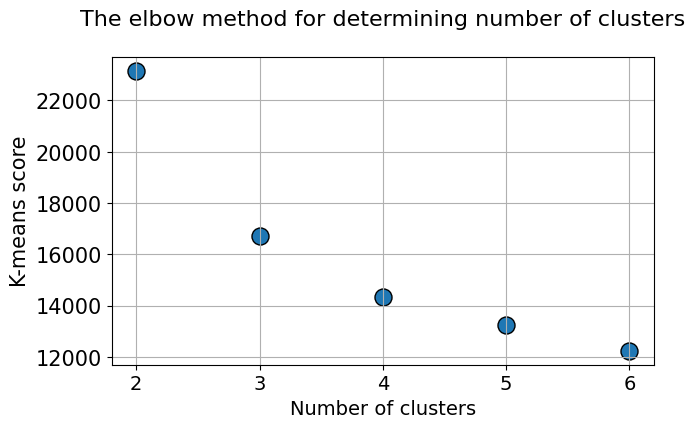

In [150]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

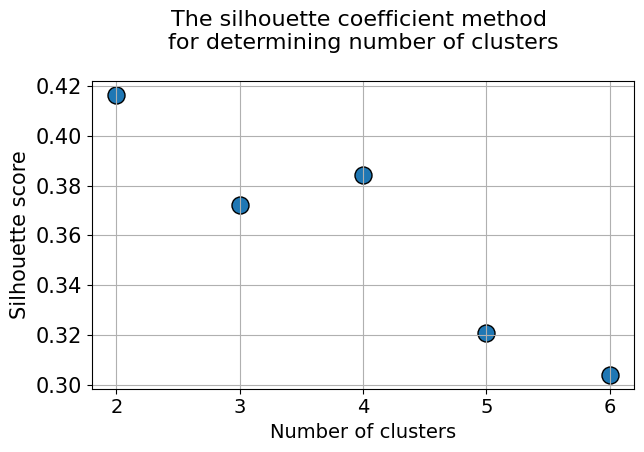

In [151]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

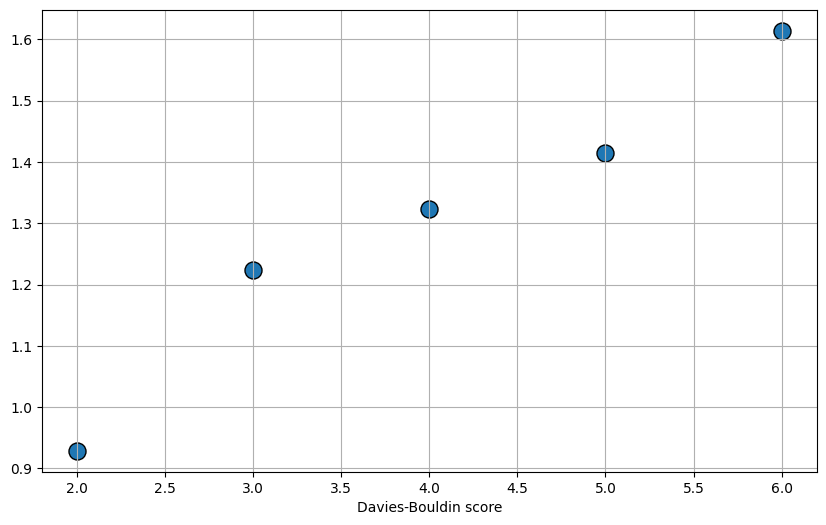

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [68]:
from sklearn.mixture import GaussianMixture

In [153]:
gm_bic= []
gm_score=[]
for i in range(2,7):
    gm = GaussianMixture(n_components=i,n_init=n_init,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -63954.304217126846
Log-likelihood score for number of cluster(s) 2: 8.84383972340829
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -204119.83114081286
Log-likelihood score for number of cluster(s) 3: 26.803362355344227
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -259974.34900595422
Log-likelihood score for number of cluster(s) 4: 34.2134594294042
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -282763.81826816296
Log-likelihood score for number of cluster(s) 5: 37.4862881597539
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -320177.3399387651
Log-likelihood score for number of cluster(s) 6: 42.5889532775402
-----

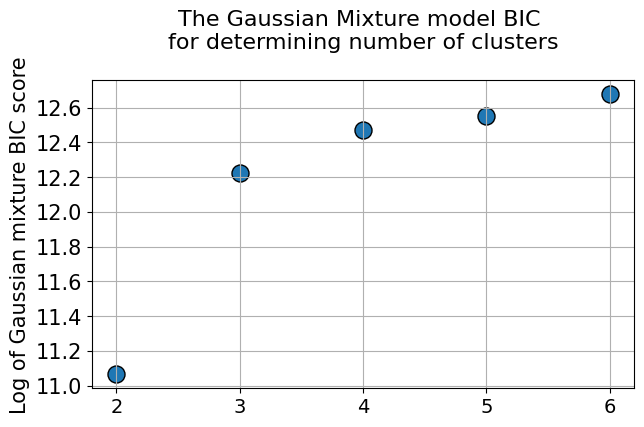

In [154]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### MinMax

In [62]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(data_11)

In [63]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    
    print("-"*100)

Score for number of cluster(s) 2: -2288.67848466664
Silhouette score for number of cluster(s) 2: 0.5195193512180588
Davies Bouldin score for number of cluster(s) 2: 0.7839546616539447
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -1558.653179551487
Silhouette score for number of cluster(s) 3: 0.5220239905764645
Davies Bouldin score for number of cluster(s) 3: 0.9165153099029771
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -1313.6778418249867
Silhouette score for number of cluster(s) 4: 0.48315567274256926
Davies Bouldin score for number of cluster(s) 4: 1.2341764527601928
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -1146.5795035438764
Silhouette score for number of cluster(s) 5: 0.4539505797402193
Davies Bouldin score fo

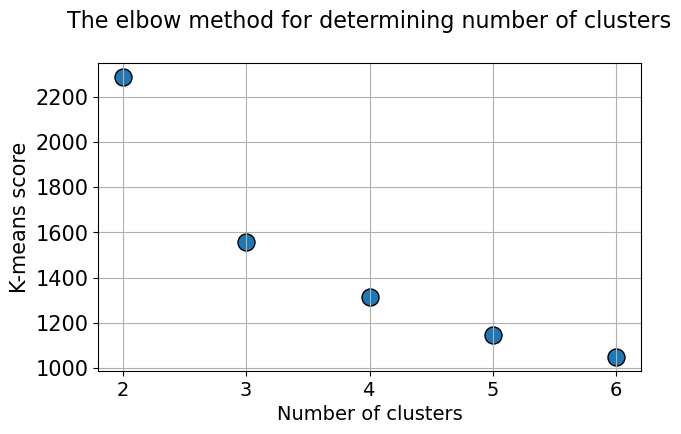

In [64]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

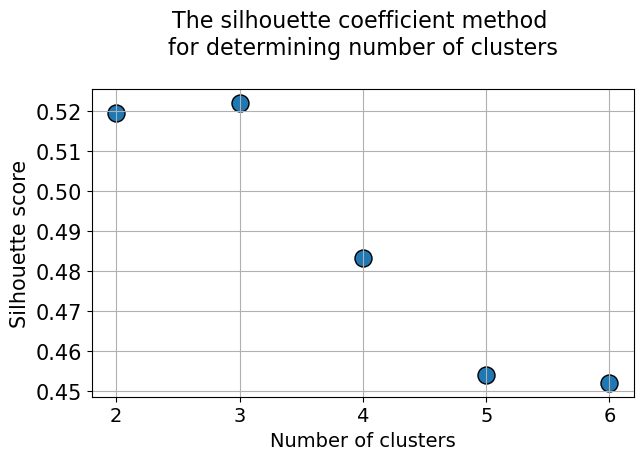

In [65]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

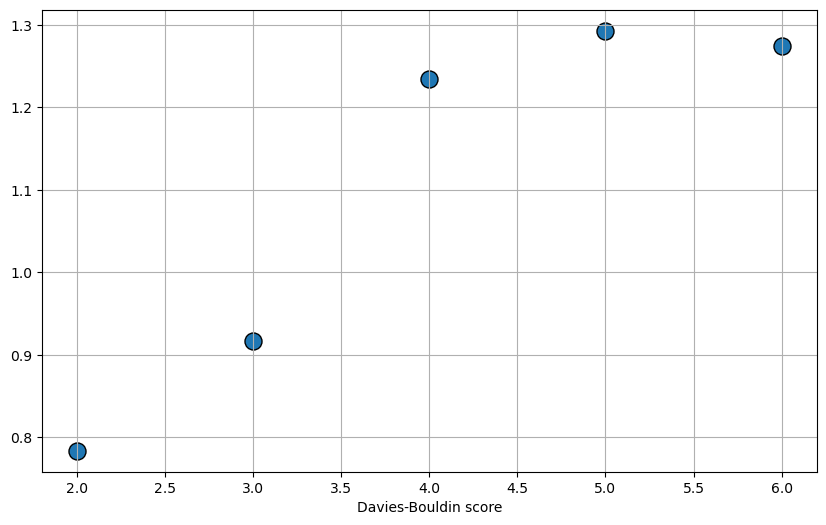

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

BIC for number of cluster(s) 2: -252878.69509482864
Log-likelihood score for number of cluster(s) 2: 64.76075674737932
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -265924.2083067937
Log-likelihood score for number of cluster(s) 3: 68.7936266500141
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -307776.7373165838
Log-likelihood score for number of cluster(s) 4: 80.02825050210515
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -312667.64872568817
Log-likelihood score for number of cluster(s) 5: 82.02246995402477
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -315326.80945087346
Log-likelihood score for number of cluster(s) 6: 83.45875173496461
----

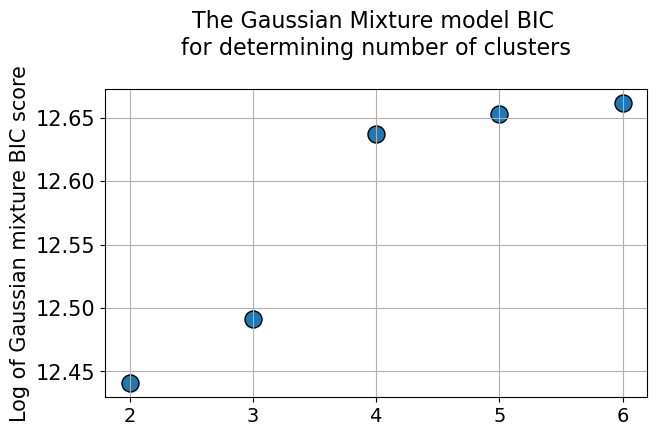

In [69]:
gm_bic= []
gm_score=[]
for i in range(2,7):
    gm = GaussianMixture(n_components=i,n_init=n_init,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Standart

In [70]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(data_11)

In [71]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    
    print("-"*100)

Score for number of cluster(s) 2: -29072.112864324354
Silhouette score for number of cluster(s) 2: 0.4932688217493792
Davies Bouldin score for number of cluster(s) 2: 0.8353325899252066
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -22304.63899788216
Silhouette score for number of cluster(s) 3: 0.4653074700738539
Davies Bouldin score for number of cluster(s) 3: 1.142482581084464
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -19451.760594131778
Silhouette score for number of cluster(s) 4: 0.4584715255469748
Davies Bouldin score for number of cluster(s) 4: 1.4230040429355406
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -17648.782315034245
Silhouette score for number of cluster(s) 5: 0.41905237415941426
Davies Bouldin score f

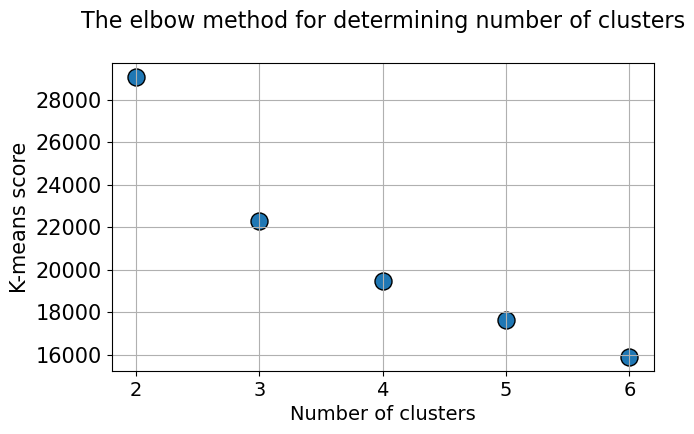

In [72]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

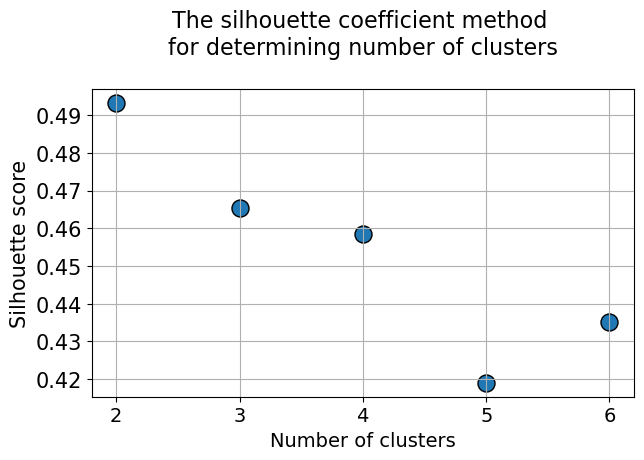

In [73]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

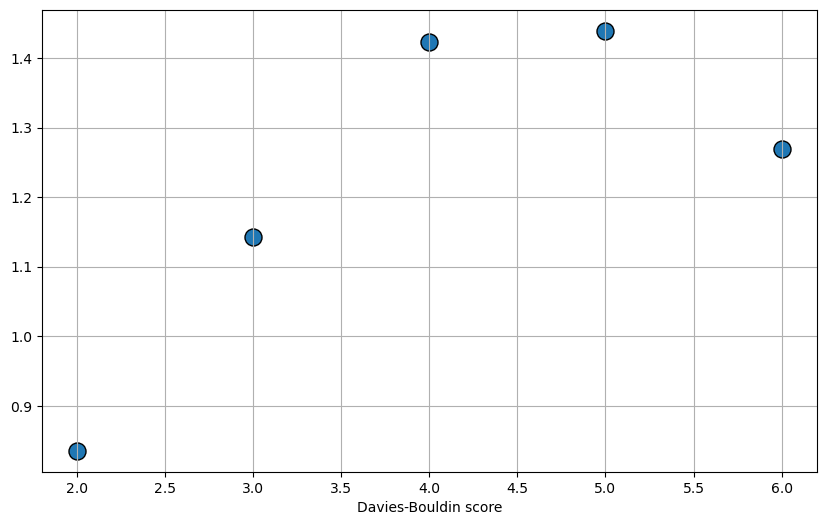

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

BIC for number of cluster(s) 2: -112163.02459041914
Log-likelihood score for number of cluster(s) 2: 29.581839121276943
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -137695.98188097973
Log-likelihood score for number of cluster(s) 3: 36.73657004356061
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -183475.03567516003
Log-likelihood score for number of cluster(s) 4: 48.95282509174921
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -190615.3095022451
Log-likelihood score for number of cluster(s) 5: 51.50938514816399
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -192667.83732005424
Log-likelihood score for number of cluster(s) 6: 52.7940087022598
--

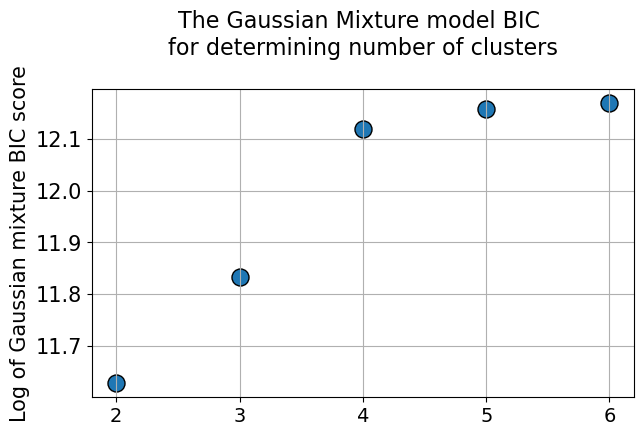

In [75]:
gm_bic= []
gm_score=[]
for i in range(2,7):
    gm = GaussianMixture(n_components=i,n_init=n_init,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### KBins

In [76]:
scaler = KBinsDiscretizer(n_bins=[2,2,2,2,2,2,2,2,2,2,
                                             2,3,3,3,3,3,3,3,3,2,
                                             3,2,3,3,2,2,3], encode='ordinal')
X_scaled=scaler.fit_transform(data_11)

In [77]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    
    print("-"*100)

Score for number of cluster(s) 2: -11653.274379569557
Silhouette score for number of cluster(s) 2: 0.41417959401029697
Davies Bouldin score for number of cluster(s) 2: 0.9312742020046968
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -8257.594134515453
Silhouette score for number of cluster(s) 3: 0.3786575507273531
Davies Bouldin score for number of cluster(s) 3: 1.2003612699239434
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -7033.3791677751315
Silhouette score for number of cluster(s) 4: 0.3924662639225685
Davies Bouldin score for number of cluster(s) 4: 1.3030851872689642
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -6490.277425273485
Silhouette score for number of cluster(s) 5: 0.33161037379619757
Davies Bouldin score 

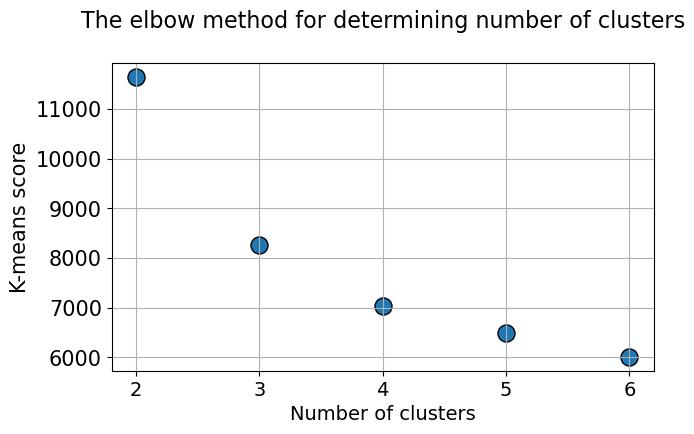

In [78]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

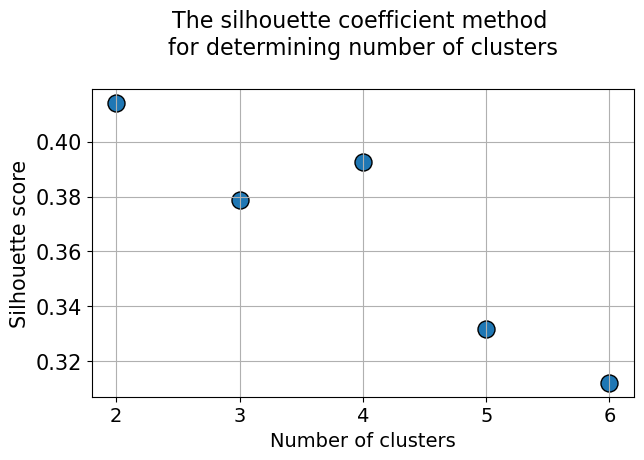

In [79]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

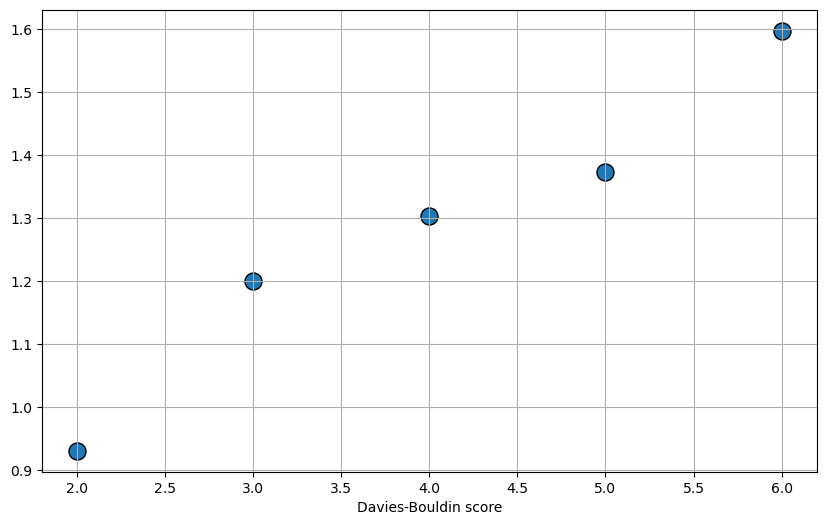

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

BIC for number of cluster(s) 2: -33388.055433535024
Log-likelihood score for number of cluster(s) 2: 9.888096832055913
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -94571.54215306722
Log-likelihood score for number of cluster(s) 3: 25.955460111582486
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -114550.16302608814
Log-likelihood score for number of cluster(s) 4: 31.721606929481233
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -139689.39118752602
Log-likelihood score for number of cluster(s) 5: 38.777905569484226
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -148827.663119087
Log-likelihood score for number of cluster(s) 6: 41.83396515201799
-

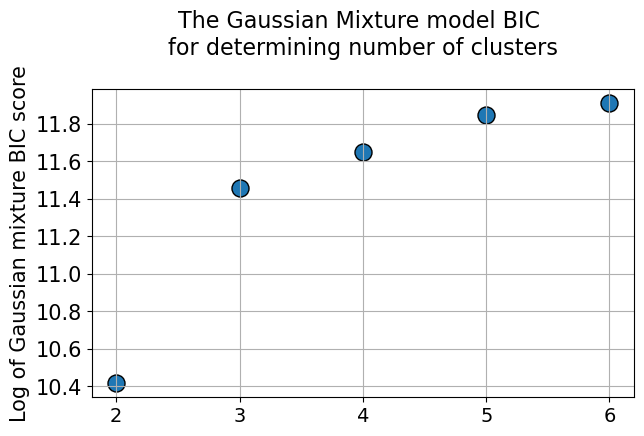

In [81]:
gm_bic= []
gm_score=[]
for i in range(2,7):
    gm = GaussianMixture(n_components=i,n_init=n_init,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### No scaler

In [82]:
X_scaled = data_11

In [83]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    
    print("-"*100)

Score for number of cluster(s) 2: -25282286112888.973
Silhouette score for number of cluster(s) 2: 0.735481407303365
Davies Bouldin score for number of cluster(s) 2: 0.46170907801857247
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -16408574811308.418
Silhouette score for number of cluster(s) 3: 0.6665877566163263
Davies Bouldin score for number of cluster(s) 3: 0.7110782988596704
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -11911550019143.2
Silhouette score for number of cluster(s) 4: 0.6557791881503536
Davies Bouldin score for number of cluster(s) 4: 0.8463272591907766
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -8974360912868.766
Silhouette score for number of cluster(s) 5: 0.6697047360653099
Davies Bouldin score for

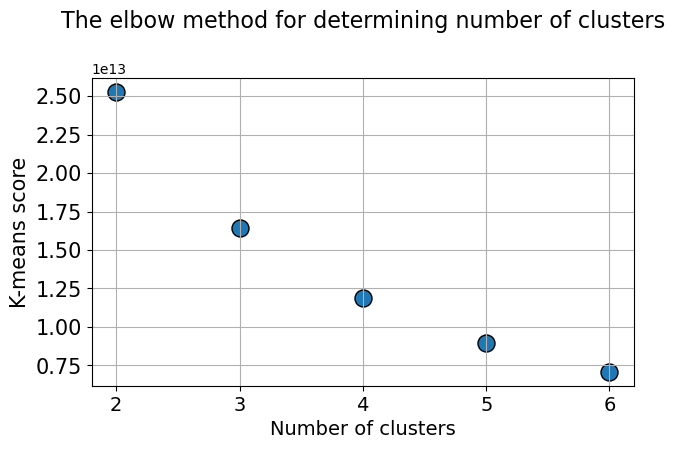

In [84]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

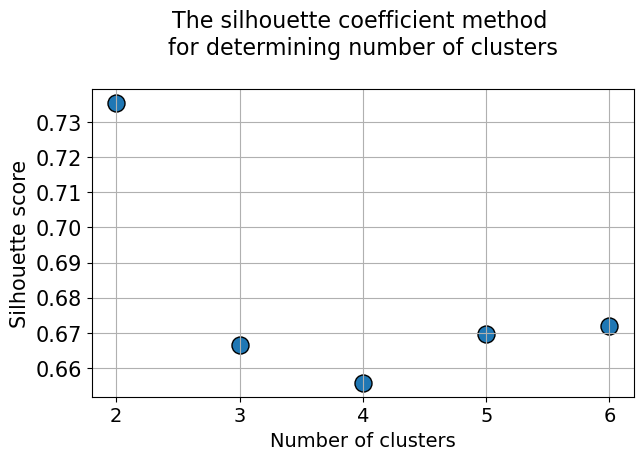

In [85]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

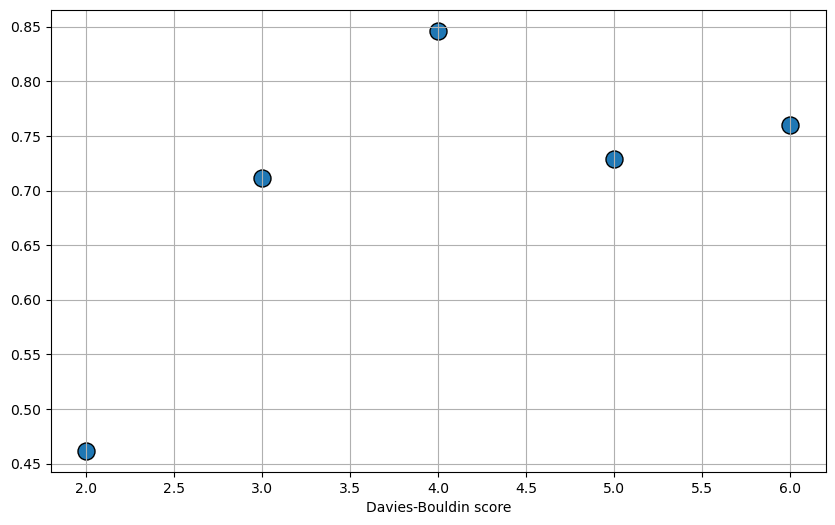

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

# Predict

In [142]:
data_11.shape

(1996, 27)

In [143]:
from sklearn.cluster import KMeans

In [144]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")

In [145]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(data_11)

In [146]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [147]:
a = kmeans.labels_

In [148]:
c1= 0
c2=0
c3=0
c4=0
for i in range(len(a)):
    if a[i]==0: c1+=1
    elif a[i]==1: c2+=1
    elif a[i]==2: c3+=1
    else: c4+=1

In [149]:
print(c1)
print(c2)
print(c3)
print(c4)

125
1168
207
496


In [150]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(data_11)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [151]:
a = kmeans.labels_

c1= 0
c2=0
c3=0
c4=0
for i in range(len(a)):
    if a[i]==0: c1+=1
    elif a[i]==1: c2+=1
    elif a[i]==2: c3+=1
    else: c4+=1

print(c1)
print(c2)
print(c3)
print(c4)

289
926
492
289


In [152]:
data_11.shape

(1996, 27)

In [153]:
scaler = KBinsDiscretizer(n_bins=[2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,2,3,2,3,3,2,2,3], encode='ordinal')
X_scaled=scaler.fit_transform(data_11)
X_scaled=scaler.fit_transform(data_11)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [154]:
a = kmeans.labels_

c1= 0
c2=0
c3=0
c4=0
for i in range(len(a)):
    if a[i]==0: c1+=1
    elif a[i]==1: c2+=1
    elif a[i]==2: c3+=1
    else: c4+=1

print(c1)
print(c2)
print(c3)
print(c4)

291
419
626
660


In [155]:
kmeans.fit(data_11)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [156]:
a = kmeans.labels_

c1= 0
c2=0
c3=0
c4=0
for i in range(len(a)):
    if a[i]==0: c1+=1
    elif a[i]==1: c2+=1
    elif a[i]==2: c3+=1
    else: c4+=1

print(c1)
print(c2)
print(c3)
print(c4)

1206
240
275
275


# Answer

In [157]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(data_11)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [158]:
a = kmeans.labels_

c1= []
c2=[]
c3=[]
c4=[]
for i in range(len(a)):
    if a[i]==0: c1.append(i)
    elif a[i]==1: c2.append(i)
    elif a[i]==2: c3.append(i)
    else: c4.append(i)

print(c1)
print(c2)
print(c3)
print(c4)

[0, 1, 3, 4, 8, 12, 17, 20, 22, 33, 36, 38, 48, 49, 61, 62, 66, 71, 74, 76, 77, 79, 95, 97, 99, 101, 104, 108, 114, 121, 127, 128, 133, 135, 138, 140, 144, 147, 155, 164, 172, 173, 183, 185, 186, 196, 197, 198, 200, 213, 214, 216, 222, 227, 228, 230, 231, 232, 234, 235, 236, 237, 238, 240, 245, 246, 247, 257, 260, 262, 269, 271, 275, 276, 277, 283, 287, 291, 292, 295, 298, 303, 305, 312, 313, 315, 316, 317, 318, 320, 329, 332, 335, 336, 341, 343, 345, 346, 350, 360, 366, 369, 371, 374, 375, 376, 379, 382, 384, 389, 392, 395, 396, 405, 408, 409, 411, 417, 420, 422, 427, 435, 437, 448, 455, 456, 457, 462, 463, 466, 467, 468, 473, 475, 478, 480, 482, 485, 487, 488, 493, 494, 498, 503, 504, 506, 509, 515, 518, 519, 523, 524, 525, 527, 530, 532, 534, 538, 539, 541, 545, 546, 548, 550, 551, 553, 554, 556, 560, 561, 563, 564, 571, 574, 579, 581, 582, 590, 592, 600, 605, 607, 610, 612, 613, 616, 618, 621, 625, 627, 632, 634, 635, 639, 646, 661, 663, 664, 666, 669, 677, 678, 681, 683, 684, 693,

In [ ]:
data_0 = data_all.[]
data_1=data_all.loc[c1]
data_2=data_all.loc[c2]
data_3=data_all.loc[c3]
data_4=data_all.loc[c4]

In [166]:
data_1.to_csv('c0.csv', index=True)

In [167]:
data_1.columns

Index(['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7',
       'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1',
       'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6',
       'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0',
       'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3',
       'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6',
       'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9',
       'flow_packets_per_second'],
      dtype='object')

In [168]:
data_1['Class'] = 0
data_2['Class'] = 1
data_3['Class'] = 2
data_4['Class'] = 3

In [173]:
data_1.drop(columns=['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7',
       'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1',
       'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6',
       'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0',
       'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3',
       'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6',
       'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9',
       'flow_packets_per_second'], inplace=True)



KeyError: "['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2', 'direction_3', 'direction_4', 'direction_5', 'direction_6', 'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1', 'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0', 'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3', 'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6', 'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9', 'flow_packets_per_second'] not found in axis"

In [174]:
data_2.drop(columns=['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7',
       'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1',
       'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6',
       'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0',
       'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3',
       'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6',
       'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9',
       'flow_packets_per_second'], inplace=True)

data_3.drop(columns=['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7',
       'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1',
       'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6',
       'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0',
       'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3',
       'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6',
       'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9',
       'flow_packets_per_second'], inplace=True)

data_4.drop(columns=['iat_0', 'iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7',
       'iat_8', 'iat_9', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1',
       'pkt_len_2', 'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6',
       'pkt_len_7', 'pkt_len_8', 'pkt_len_9', 'payload_bytes_0',
       'payload_bytes_1', 'payload_bytes_2', 'payload_bytes_3',
       'payload_bytes_4', 'payload_bytes_5', 'payload_bytes_6',
       'payload_bytes_7', 'payload_bytes_8', 'payload_bytes_9',
       'flow_packets_per_second'], inplace=True)

In [171]:
data_1.to_csv('c0.csv', index=True)

In [175]:
data_2.to_csv('c1.csv', index=True)
data_3.to_csv('c2.csv', index=True)
data_4.to_csv('c3.csv', index=True)

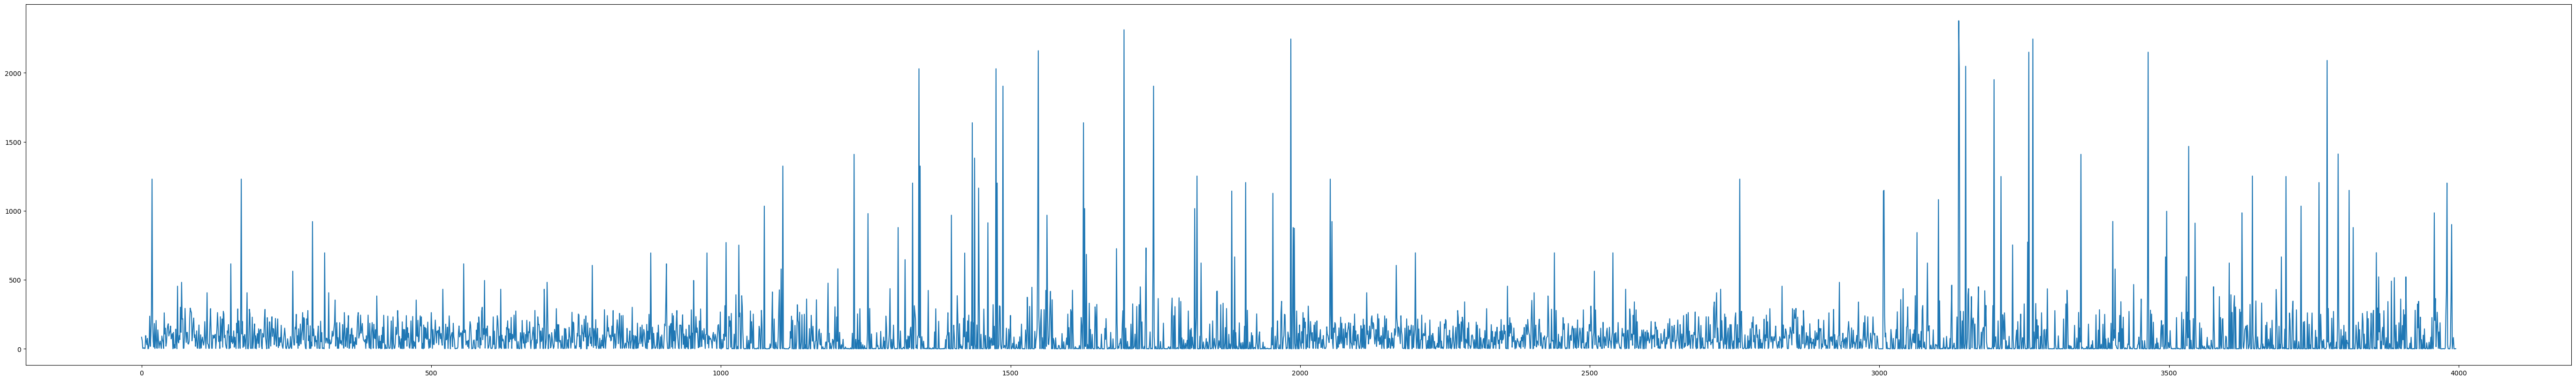

In [120]:
plt.plot(data_11['flow_packets_per_second'])

In [121]:
data_11.columns

Index(['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8',
       'iat_9', 'direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1', 'pkt_len_2',
       'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7',
       'pkt_len_8', 'pkt_len_9', 'flow_packets_per_second', 'p_0', 'p_1',
       'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9'],
      dtype='object')

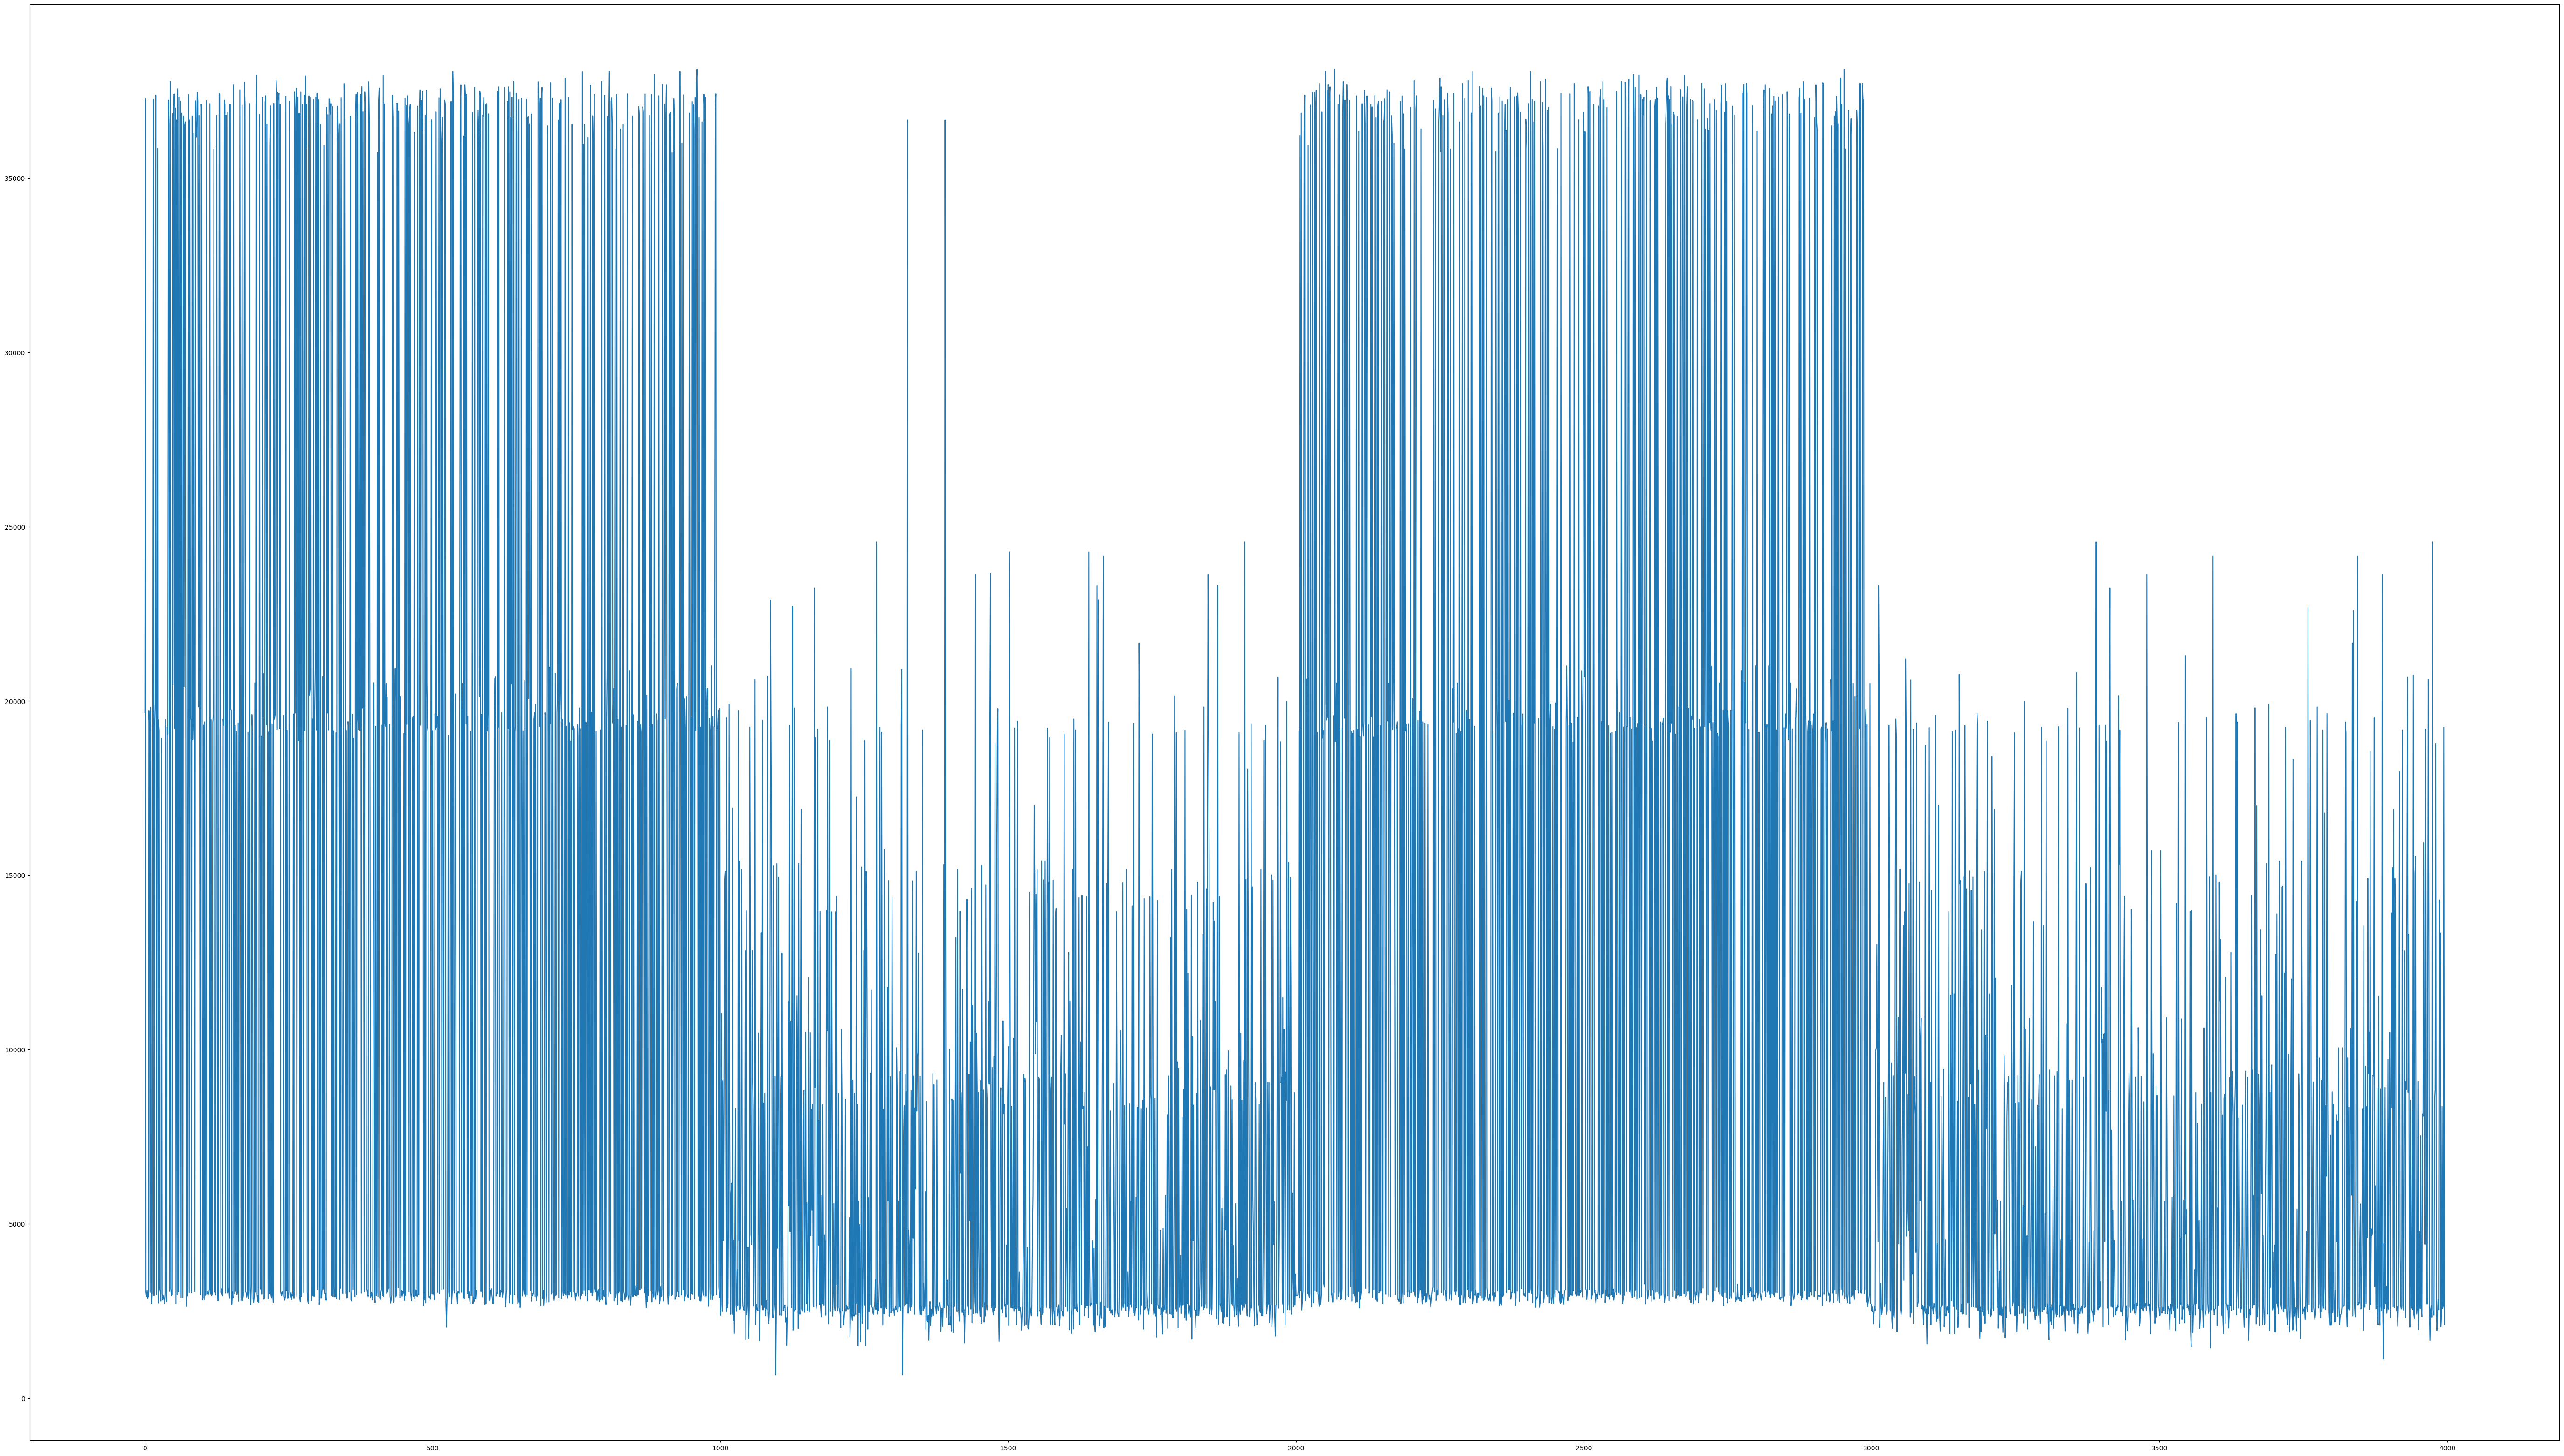

In [124]:
plt.plot(data_11['p_1'])

In [125]:
data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1           -1           -1   
1     0.006289     0.007581  0.115450            1           -1           -1   
2     0.001306     0.063449  0.000004            1           -1            1   
3     0.052732     0.002085  0.248956            1           -1           -1   
4     0.010099     0.042989  0.000043            1           -1           -1   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1           -1           -1   
3992  0.041867     5.391821  0.042908            1            1           -1   
3993  0.319249  1109.746278  0.583709            1           -1            1   
3994  0.019090     0.032696  0.004415            1           -1            1   
3995  0.086543     2.546980  0.060018            1           -1            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0              -1           -1           -1            1            1   
1              -1            1           -1           -1            1   
2              -1            1           -1            1            1   
3              -1           -1           -1            1           -1   
4              -1           -1           -1            1            1   
...           ...          ...          ...          ...          ...   
3991           -1           -1           -1            1            1   
3992            1           -1            1            1           -1   
3993           -1           -1            1            1           -1   
3994            1           -1            1           -1            1   
3995           -1            1           -1            1           -1   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2              -1           -1        101        207        101        207   
3               1            1       1420       1420        678         90   
4              -1           -1       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991           -1            1         87        488         32         32   
3992            1           -1        114        114         77        114   
3993            1           -1        112        318        112        318   
3994           -1            1       1132        174        527        129   
3995            1           -1        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

In [128]:
data_11.columns

Index(['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8',
       'iat_9', 'direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1', 'pkt_len_2',
       'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7',
       'pkt_len_8', 'pkt_len_9', 'flow_packets_per_second', 'p_0', 'p_1',
       'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9'],
      dtype='object')

In [129]:
columns = ['direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9']
dict = {1: 1, -1: 0}

for col in columns:
    data_11[col] = data_11[col].replace(dict)

In [130]:
data_11

iat_1     iat_2       iat_3     iat_4     iat_5       iat_6  \
0      0.003061  0.003867    0.025016  0.000014  0.000027    0.013275   
1      0.020414  0.000378    0.000021  0.003850  0.019655    0.000053   
2      0.053919  0.425309    0.067832  1.573668  0.055006    0.905750   
3      0.056857  0.000029    0.022673  0.276671  0.600587    0.927622   
4      0.056204  0.001165    0.000024  0.000004  0.000004    1.270077   
...         ...       ...         ...       ...       ...         ...   
3991   0.043773  0.000070    0.000011  0.000009  0.001074    0.001119   
3992  53.258168  0.041867  109.997794  0.038928  6.917624   19.004221   
3993   0.281482  6.584394    0.611591  0.400079  0.000757  400.937152   
3994   0.012054  0.019019    0.000039  0.002056  0.023012   26.293754   
3995   0.070131  0.055008    0.067436  8.526539  0.080746    0.094534   

         iat_7        iat_8     iat_9  direction_0  direction_1  direction_2  \
0     0.000012     0.040643  0.033278            1            0            0   
1     0.006289     0.007581  0.115450            1            0            0   
2     0.001306     0.063449  0.000004            1            0            1   
3     0.052732     0.002085  0.248956            1            0            0   
4     0.010099     0.042989  0.000043            1            0            0   
...        ...          ...       ...          ...          ...          ...   
3991  0.002795     0.045237  0.028613            1            0            0   
3992  0.041867     5.391821  0.042908            1            1            0   
3993  0.319249  1109.746278  0.583709            1            0            1   
3994  0.019090     0.032696  0.004415            1            0            1   
3995  0.086543     2.546980  0.060018            1            0            1   

      direction_3  direction_4  direction_5  direction_6  direction_7  \
0               0            0            0            1            1   
1               0            1            0            0            1   
2               0            1            0            1            1   
3               0            0            0            1            0   
4               0            0            0            1            1   
...           ...          ...          ...          ...          ...   
3991            0            0            0            1            1   
3992            1            0            1            1            0   
3993            0            0            1            1            0   
3994            1            0            1            0            1   
3995            0            1            0            1            0   

      direction_8  direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  \
0               1            1       1258       1208       1208       1208   
1               1            1       1258       1258       1258       1258   
2               0            0        101        207        101        207   
3               1            1       1420       1420        678         90   
4               0            0       1420       1263       1263       1263   
...           ...          ...        ...        ...        ...        ...   
3991            0            1         87        488         32         32   
3992            1            0        114        114         77        114   
3993            1            0        112        318        112        318   
3994            0            1       1132        174        527        129   
3995            1            0        114         77        142         57   

      pkt_len_4  pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0          1208       1110       1258         59         60         93   
1          1258       1258        263         48         48         45   
2           101        207        101        101        207        207   
3          1420       1420        177        188         95   

In [ ]:
columns = ['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9']

data_11['']

for col in columns:
    data_1[col] = data_1[col].replace(dict)

In [133]:
data_11['dp0'] = data_11['direction_0'] * data_11['p_0']
data_11['dp1'] = data_11['direction_1'] * data_11['p_1']
data_11['dp2'] = data_11['direction_2'] * data_11['p_2']
data_11['dp3'] = data_11['direction_3'] * data_11['p_3']
data_11['dp4'] = data_11['direction_4'] * data_11['p_4']
data_11['dp5'] = data_11['direction_5'] * data_11['p_5']
data_11['dp6'] = data_11['direction_6'] * data_11['p_6']
data_11['dp7'] = data_11['direction_7'] * data_11['p_7']
data_11['dp8'] = data_11['direction_8'] * data_11['p_8']
data_11['dp9'] = data_11['direction_9'] * data_11['p_9']

In [134]:
data_11['sum_plus_p'] = data_11['dp0']+data_11['dp1']+data_11['dp2']+data_11['dp3']+data_11['dp4']+data_11['dp5']+data_11['dp6']+data_11['dp7']+data_11['dp8']+data_11['dp9']

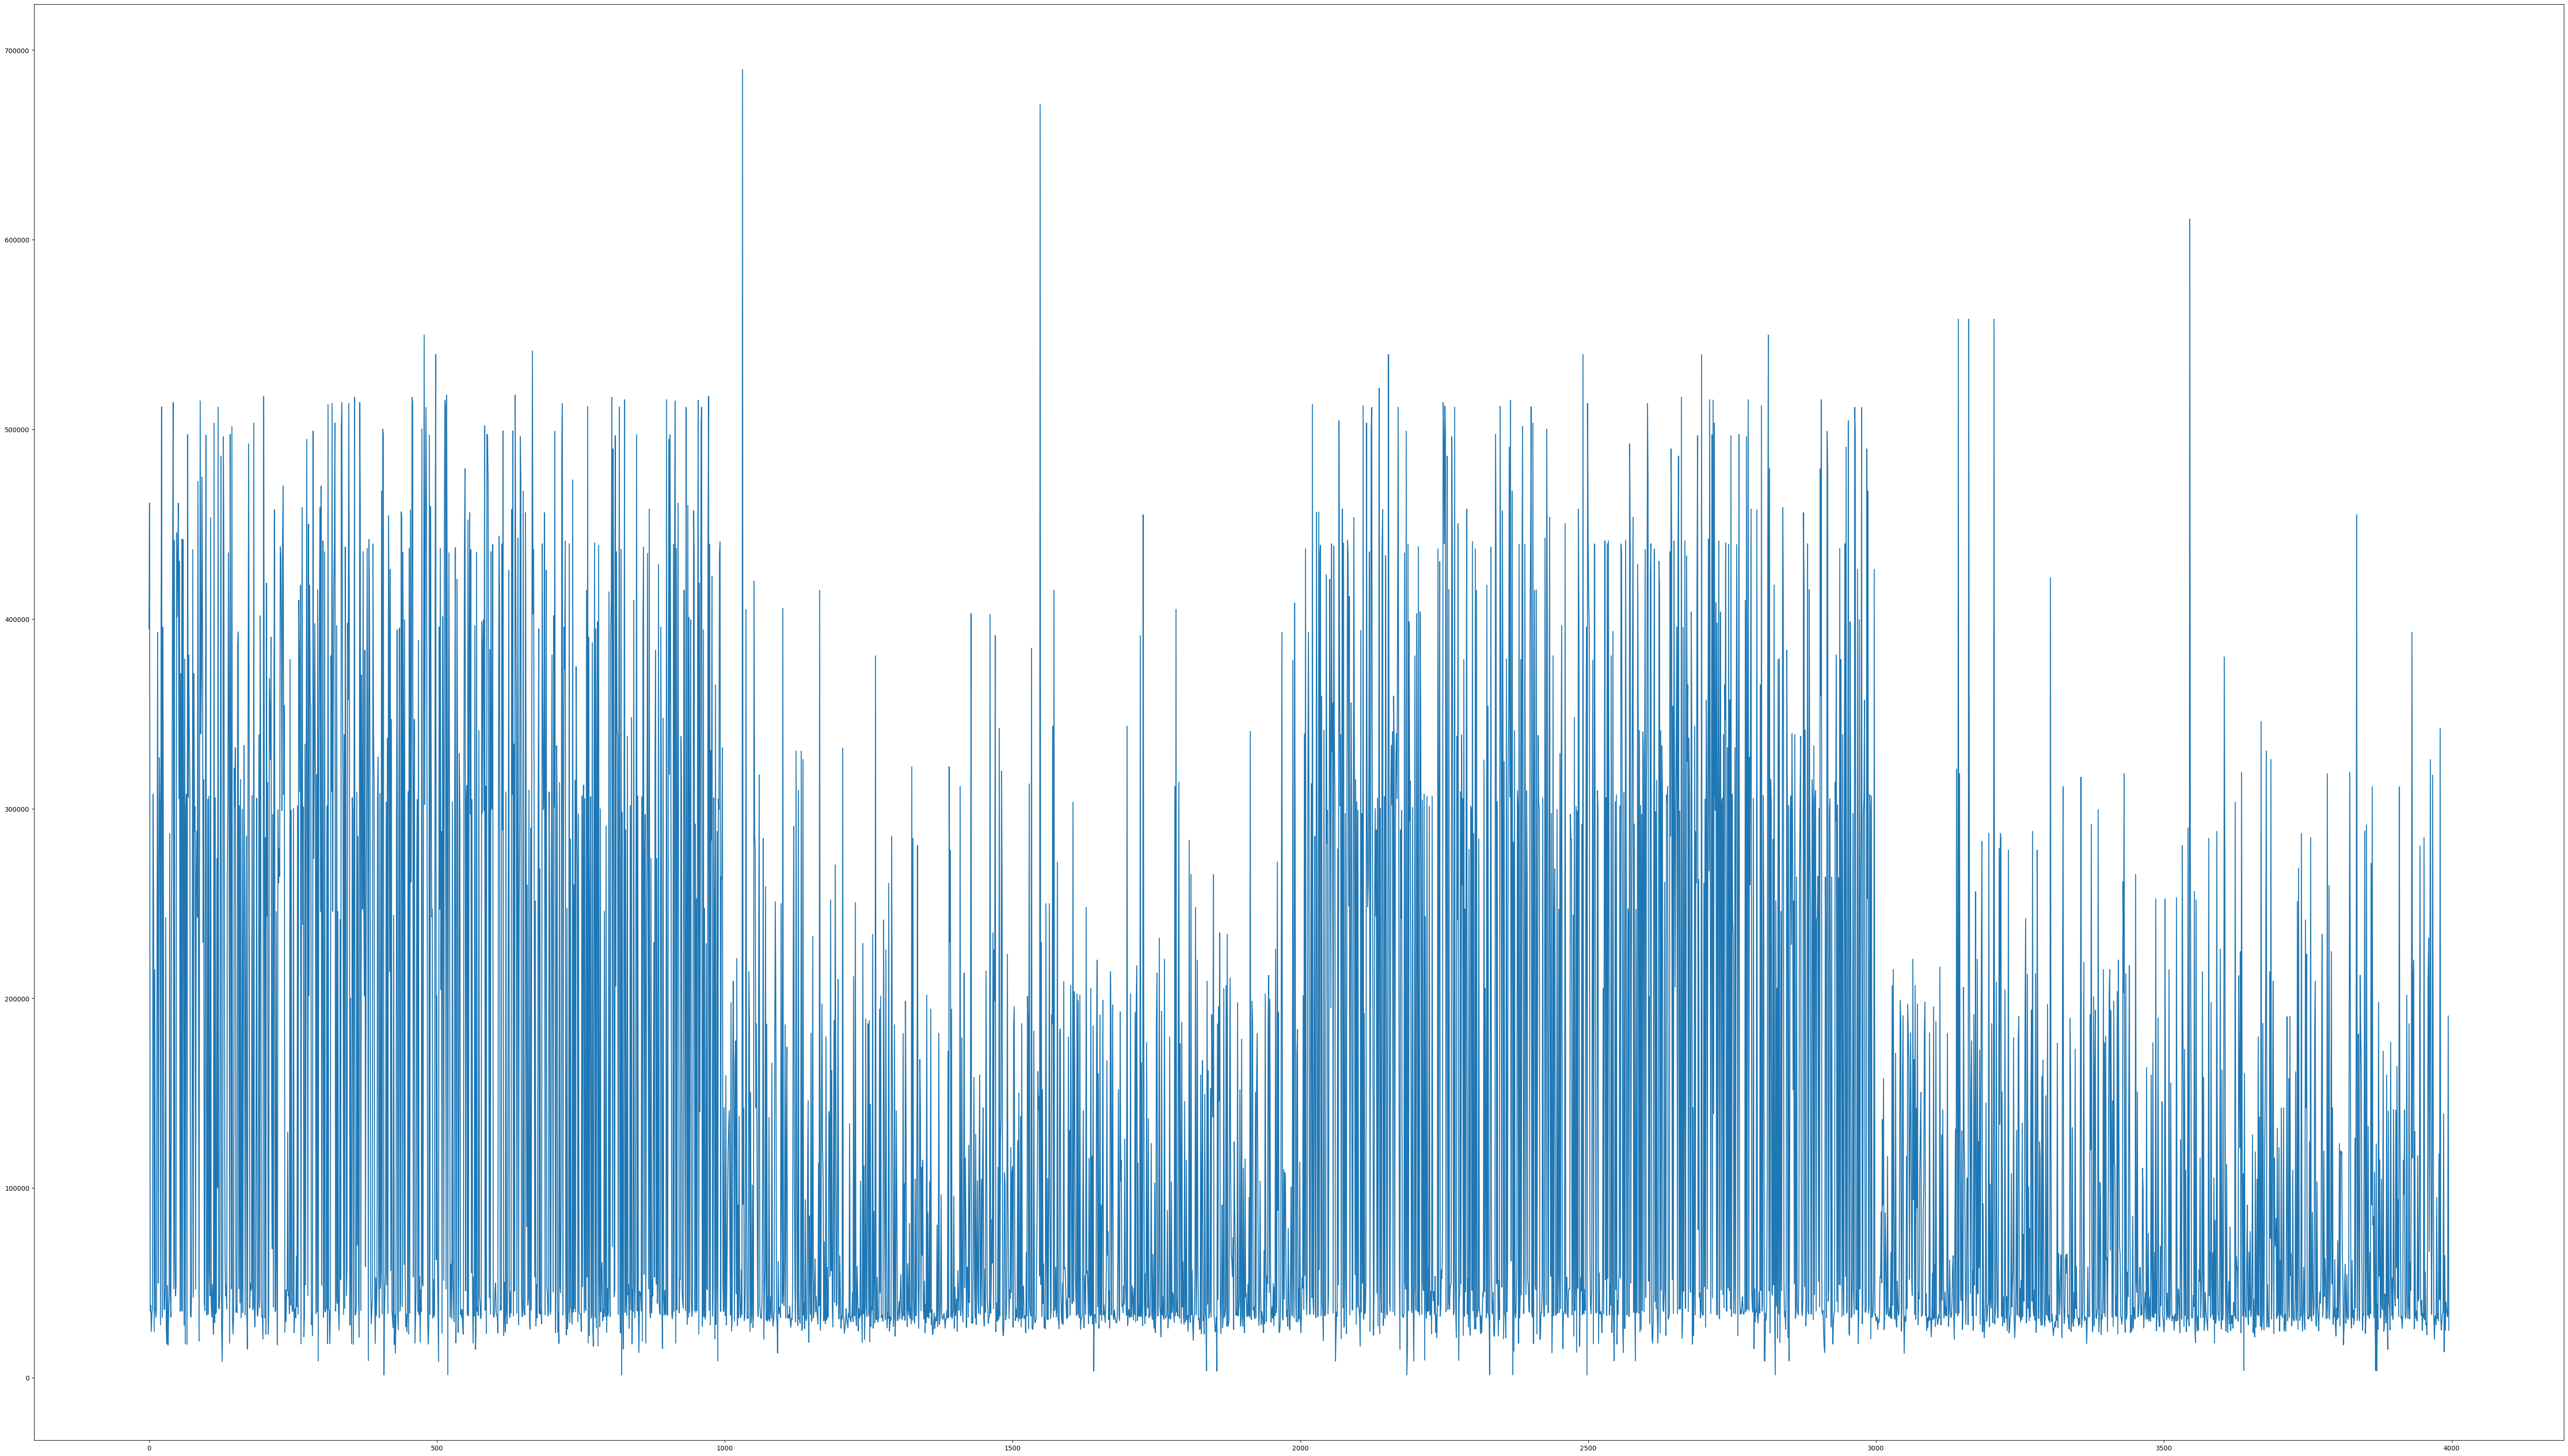

In [135]:
plt.plot(data_11['sum_plus_p'])

In [136]:
a = data_11['sum_plus_p']
a.sort_values()
plt.plot(a.sort_values().values)

821       1400
2498      1408
408       1427
2185      1453
2825      1459
         ...  
3205    558090
3143    558090
3545    610807
1548    671207
1031    689684
Name: sum_plus_p, Length: 3996, dtype: int64

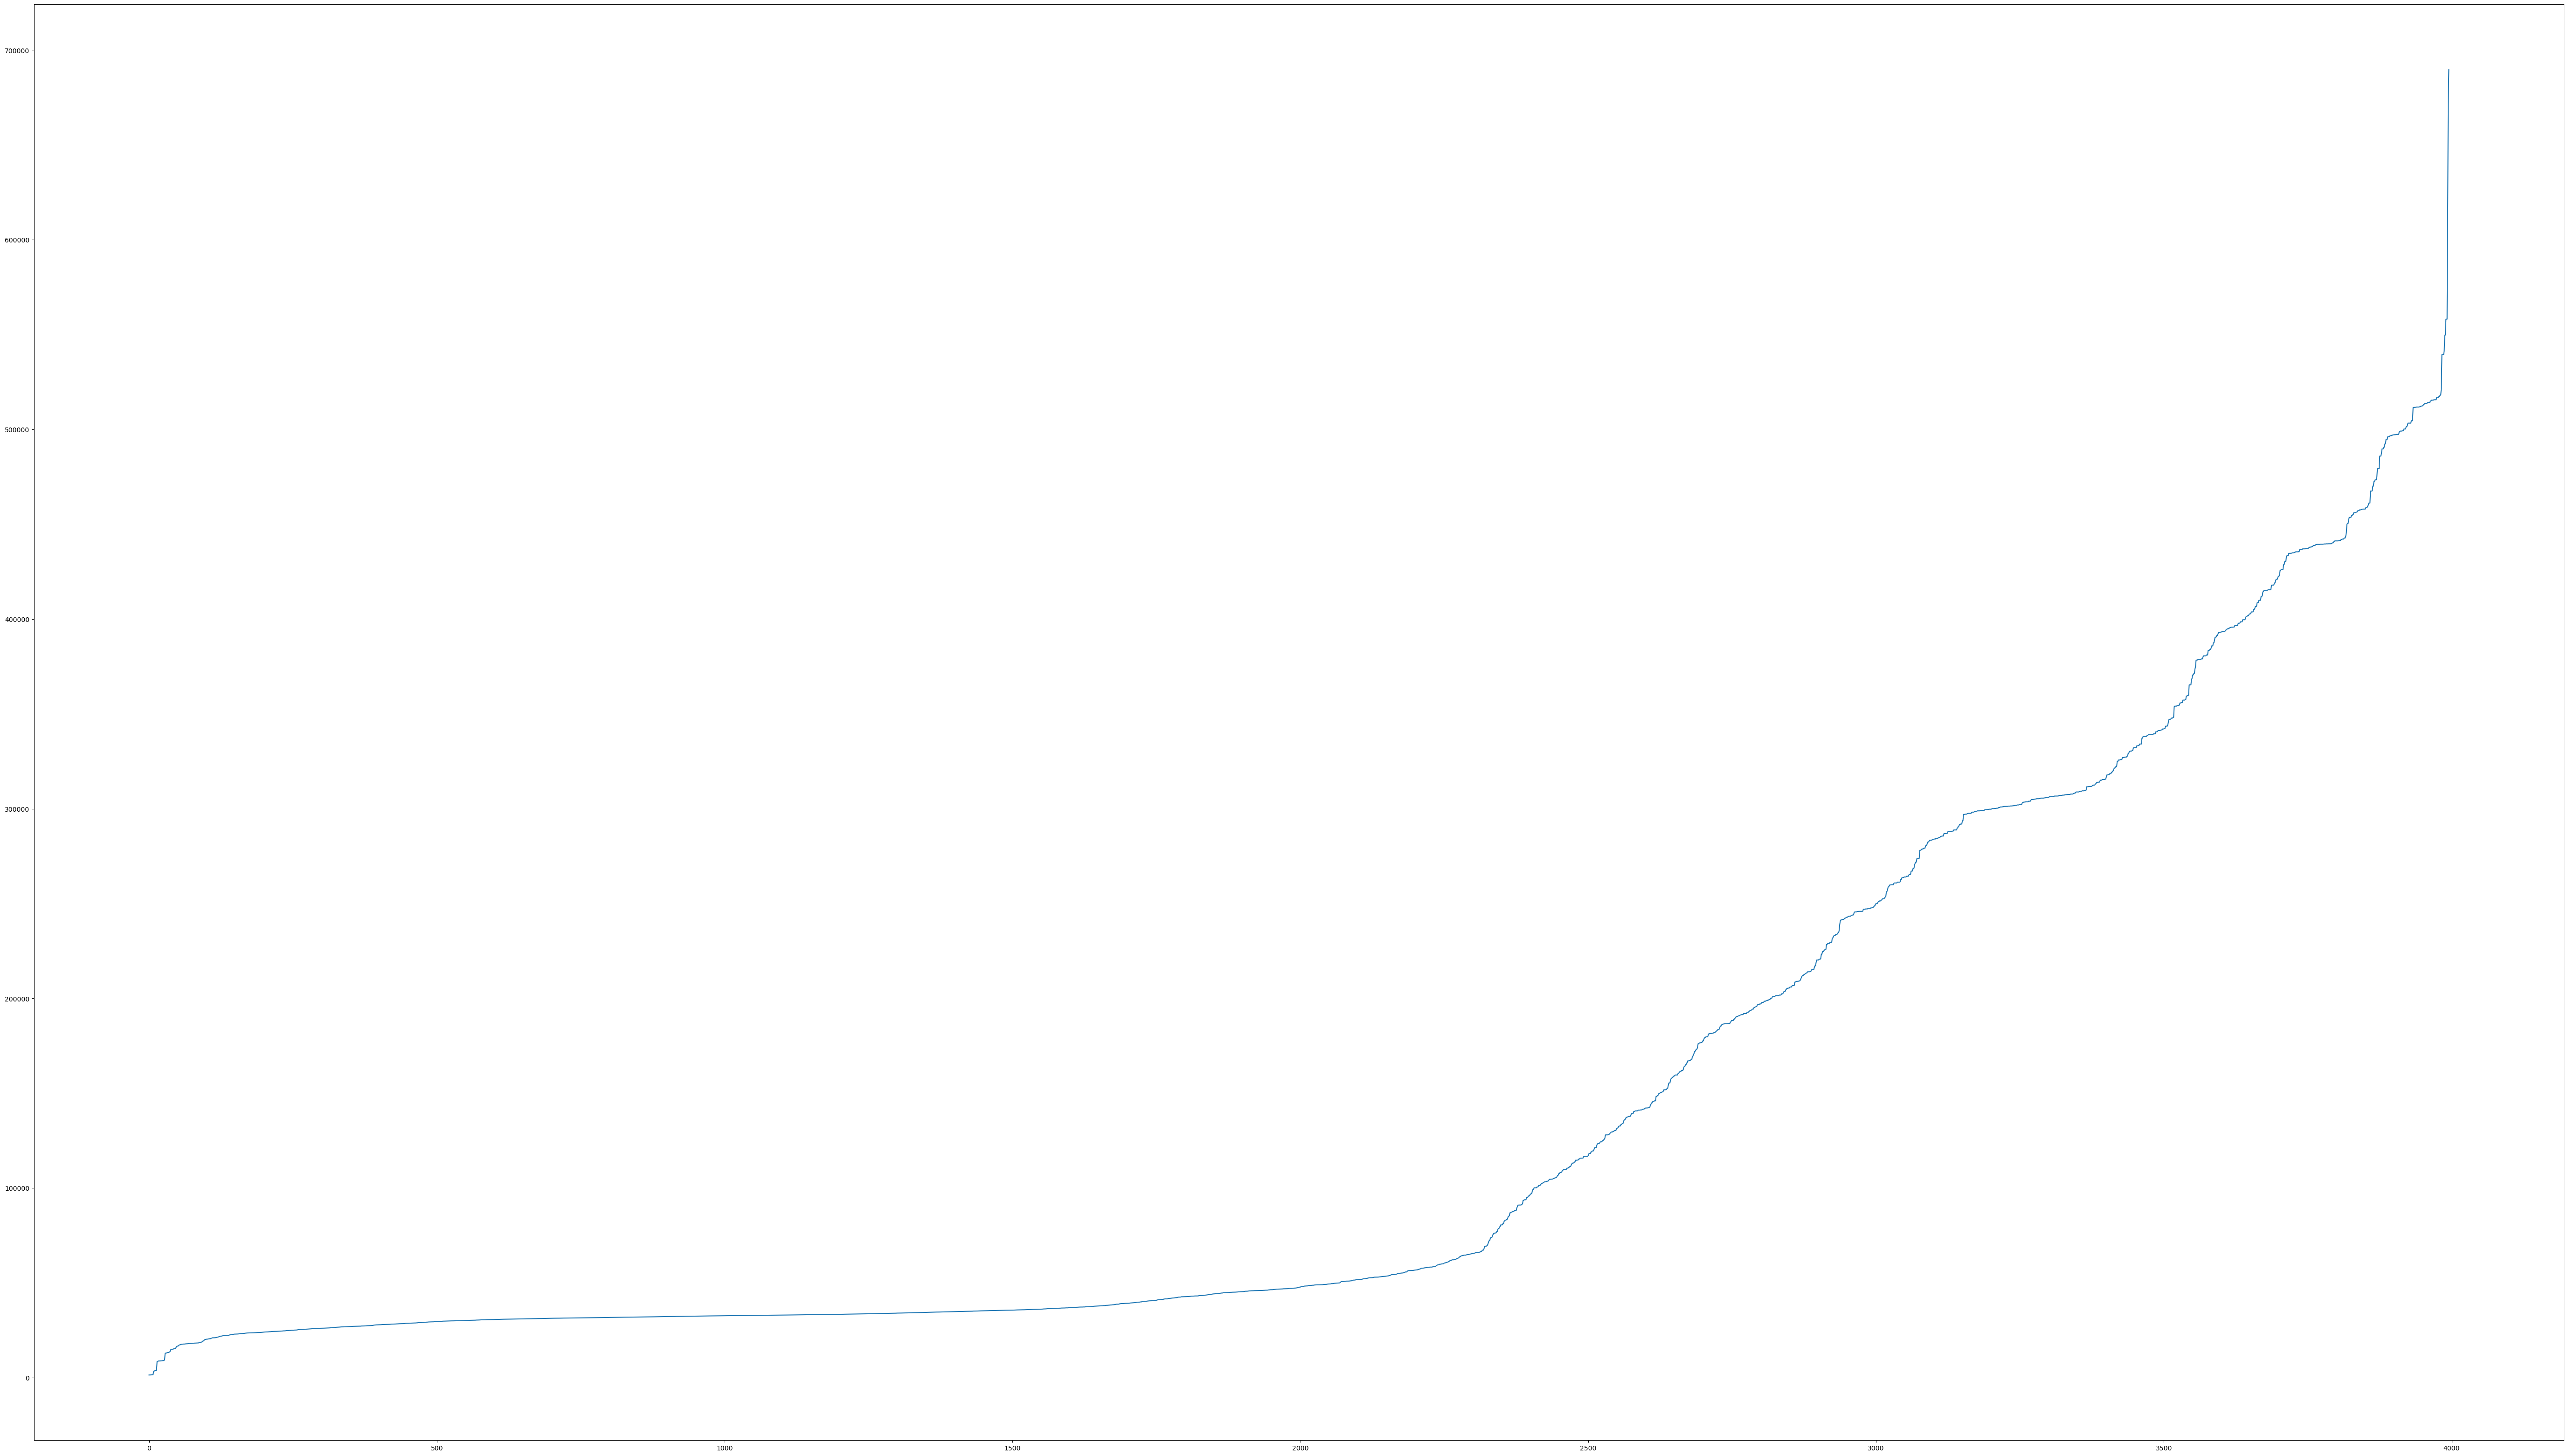

In [139]:
plt.plot(a.sort_values().values)

## data_1 

In [101]:
data_1 = pd.read_csv('dataset_1.csv',index_col='Unnamed: 0')

In [102]:
#data_1.info()

In [103]:
data_1 = data_1.drop('iat_0', axis=1)

In [104]:
#data_1.info()

In [105]:
pd.set_option('display.max_columns', None)
data_1

iat_1     iat_2     iat_3     iat_4     iat_5     iat_6     iat_7  \
0    0.003061  0.003867  0.025016  0.000014  0.000027  0.013275  0.000012   
1    0.020414  0.000378  0.000021  0.003850  0.019655  0.000053  0.006289   
2    0.053919  0.425309  0.067832  1.573668  0.055006  0.905750  0.001306   
3    0.056857  0.000029  0.022673  0.276671  0.600587  0.927622  0.052732   
4    0.056204  0.001165  0.000024  0.000004  0.000004  1.270077  0.010099   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.014186  0.006800  0.021113  0.010979  0.000076  0.000013  0.002588   
996  0.000857  0.013792  0.029542  0.000125  0.000023  0.000039  0.000030   
997  0.047882  0.001432  0.000071  0.001779  0.000457  0.046484  0.000102   
998  0.065959  0.657115  0.059205  0.857395  0.055245  1.081865  0.001798   
999  0.003889  0.004176  0.003952  0.007810  0.013233  0.004387  0.000031   

        iat_8     iat_9  direction_0  direction_1  direction_2  direction_3  \
0    0.040643  0.033278            1           -1           -1           -1   
1    0.007581  0.115450            1           -1           -1           -1   
2    0.063449  0.000004            1           -1            1           -1   
3    0.002085  0.248956            1           -1           -1           -1   
4    0.042989  0.000043            1           -1           -1           -1   
..        ...       ...          ...          ...          ...          ...   
995  0.000633  0.002711            1           -1           -1            1   
996  0.009169  0.003511            1            1            1           -1   
997  0.006830  0.000337            1           -1           -1           -1   
998  0.052536  0.000493            1           -1            1           -1   
999  0.000013  0.000004            1           -1           -1            1   

     direction_4  direction_5  direction_6  direction_7  direction_8  \
0             -1           -1            1            1            1   
1              1           -1           -1            1            1   
2              1           -1            1            1           -1   
3             -1           -1            1           -1            1   
4             -1           -1            1            1           -1   
..           ...          ...          ...          ...          ...   
995           -1           -1           -1           -1            1   
996           -1           -1           -1           -1            1   
997            1            1           -1           -1            1   
998            1           -1            1            1           -1   
999            1            1           -1           -1           -1   

     direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  pkt_len_4  \
0              1       1258       1208       1208       1208       1208   
1              1       1258       1258       1258       1258       1258   
2             -1        101        207        101        207        101   
3              1       1420       1420        678         90       1420   
4             -1       1420       1263       1263       1263       1263   
..           ...        ...        ...        ...        ...        ...   
995            1       1258       1208       1208       1258       1208   
996            1       1258         85        923       1258       1258   
997            1       1313       1313       1313       1313       1313   
998           -1        104        136        104        136        104   
999           -1       1258       1208       1208       1258         57   

     pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0         1110       1258         59         60         93   
1         1258        263         48         48         45   
2          207        101        101        207        207   
3         1420        177        188         95        179   
4          384       1420       1420       1263        726

In [106]:
for i in range(10):
    data_1[f'p_{i}'] = 0
for i in range(10):
    data_1[f'payload_bytes_{i}'] = data_1[f'payload_bytes_{i}'].astype('str')
for i in range(data_1.shape[0]):
    sum = 0
    for j in range(10):
        for s in data_1[f'payload_bytes_{j}'].values[i]:
            if s == '1' or s == '2' or s == '3' or s == '4' or s == '5' or s == '6' or s == '7' or s == '8' or s == '9':
                sum += int(s)
            elif s == 'a' and data_1[f'payload_bytes_{j}'].values[i] != 'nan':
                sum += 10
            elif s == 'b':
                sum += 11
            elif s == 'c':
                sum += 12
            elif s == 'd':
                sum += 13
            elif s == 'e':
                sum += 14
            elif s == 'f':
                sum += 15
        data_1[f'p_{j}'].values[i] = sum

In [107]:
for i in range(10):
    data_1.drop(columns = [f'payload_bytes_{i}'], inplace = True)

In [108]:
data_1

iat_1     iat_2     iat_3     iat_4     iat_5     iat_6     iat_7  \
0    0.003061  0.003867  0.025016  0.000014  0.000027  0.013275  0.000012   
1    0.020414  0.000378  0.000021  0.003850  0.019655  0.000053  0.006289   
2    0.053919  0.425309  0.067832  1.573668  0.055006  0.905750  0.001306   
3    0.056857  0.000029  0.022673  0.276671  0.600587  0.927622  0.052732   
4    0.056204  0.001165  0.000024  0.000004  0.000004  1.270077  0.010099   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.014186  0.006800  0.021113  0.010979  0.000076  0.000013  0.002588   
996  0.000857  0.013792  0.029542  0.000125  0.000023  0.000039  0.000030   
997  0.047882  0.001432  0.000071  0.001779  0.000457  0.046484  0.000102   
998  0.065959  0.657115  0.059205  0.857395  0.055245  1.081865  0.001798   
999  0.003889  0.004176  0.003952  0.007810  0.013233  0.004387  0.000031   

        iat_8     iat_9  direction_0  direction_1  direction_2  direction_3  \
0    0.040643  0.033278            1           -1           -1           -1   
1    0.007581  0.115450            1           -1           -1           -1   
2    0.063449  0.000004            1           -1            1           -1   
3    0.002085  0.248956            1           -1           -1           -1   
4    0.042989  0.000043            1           -1           -1           -1   
..        ...       ...          ...          ...          ...          ...   
995  0.000633  0.002711            1           -1           -1            1   
996  0.009169  0.003511            1            1            1           -1   
997  0.006830  0.000337            1           -1           -1           -1   
998  0.052536  0.000493            1           -1            1           -1   
999  0.000013  0.000004            1           -1           -1            1   

     direction_4  direction_5  direction_6  direction_7  direction_8  \
0             -1           -1            1            1            1   
1              1           -1           -1            1            1   
2              1           -1            1            1           -1   
3             -1           -1            1           -1            1   
4             -1           -1            1            1           -1   
..           ...          ...          ...          ...          ...   
995           -1           -1           -1           -1            1   
996           -1           -1           -1           -1            1   
997            1            1           -1           -1            1   
998            1           -1            1            1           -1   
999            1            1           -1           -1           -1   

     direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  pkt_len_4  \
0              1       1258       1208       1208       1208       1208   
1              1       1258       1258       1258       1258       1258   
2             -1        101        207        101        207        101   
3              1       1420       1420        678         90       1420   
4             -1       1420       1263       1263       1263       1263   
..           ...        ...        ...        ...        ...        ...   
995            1       1258       1208       1208       1258       1208   
996            1       1258         85        923       1258       1258   
997            1       1313       1313       1313       1313       1313   
998           -1        104        136        104        136        104   
999           -1       1258       1208       1208       1258         57   

     pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0         1110       1258         59         60         93   
1         1258        263         48         48         45   
2          207        101        101        207        207   
3         1420        177        188         95        179   
4          384       1420       1420       1263        726

In [123]:
plt.rcParams["figure.figsize"] = (70,40)

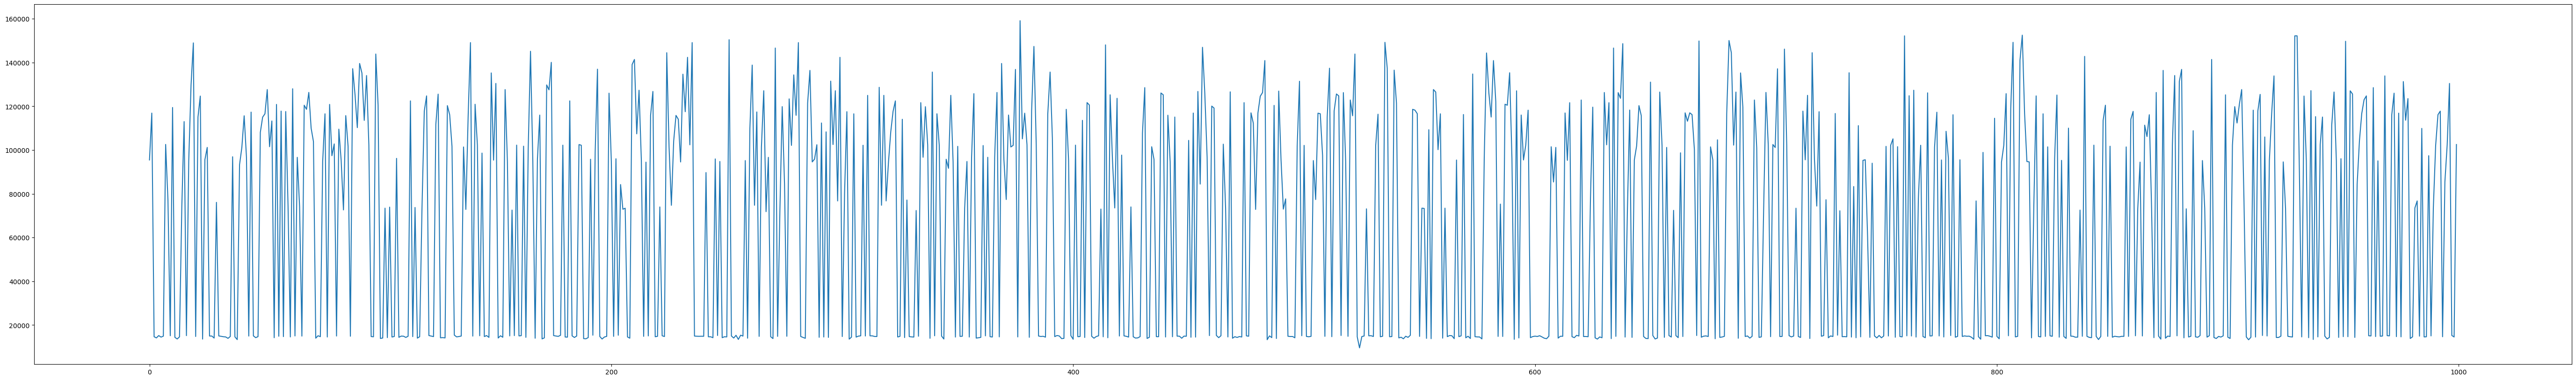

In [112]:
plt.plot(data_1['p_9'])

In [23]:
data_1.columns

Index(['iat_1', 'iat_2', 'iat_3', 'iat_4', 'iat_5', 'iat_6', 'iat_7', 'iat_8',
       'iat_9', 'direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9', 'pkt_len_0', 'pkt_len_1', 'pkt_len_2',
       'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7',
       'pkt_len_8', 'pkt_len_9', 'flow_packets_per_second', 'p_0', 'p_1',
       'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9'],
      dtype='object')

In [38]:
columns = ['direction_0', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7',
       'direction_8', 'direction_9']
dict = {1: 1, -1: 0}

for col in columns:
    data_1[col] = data_1[col].replace(dict)


In [39]:
data_1['direction_sent'] = 0
for col in columns:
    data_1['direction_sent'] = data_1['direction_sent'] + data_1[col]
data_1

iat_1     iat_2     iat_3     iat_4     iat_5     iat_6     iat_7  \
0    0.003061  0.003867  0.025016  0.000014  0.000027  0.013275  0.000012   
1    0.020414  0.000378  0.000021  0.003850  0.019655  0.000053  0.006289   
2    0.053919  0.425309  0.067832  1.573668  0.055006  0.905750  0.001306   
3    0.056857  0.000029  0.022673  0.276671  0.600587  0.927622  0.052732   
4    0.056204  0.001165  0.000024  0.000004  0.000004  1.270077  0.010099   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.014186  0.006800  0.021113  0.010979  0.000076  0.000013  0.002588   
996  0.000857  0.013792  0.029542  0.000125  0.000023  0.000039  0.000030   
997  0.047882  0.001432  0.000071  0.001779  0.000457  0.046484  0.000102   
998  0.065959  0.657115  0.059205  0.857395  0.055245  1.081865  0.001798   
999  0.003889  0.004176  0.003952  0.007810  0.013233  0.004387  0.000031   

        iat_8     iat_9  direction_0  direction_1  direction_2  direction_3  \
0    0.040643  0.033278            1            0            0            0   
1    0.007581  0.115450            1            0            0            0   
2    0.063449  0.000004            1            0            1            0   
3    0.002085  0.248956            1            0            0            0   
4    0.042989  0.000043            1            0            0            0   
..        ...       ...          ...          ...          ...          ...   
995  0.000633  0.002711            1            0            0            1   
996  0.009169  0.003511            1            1            1            0   
997  0.006830  0.000337            1            0            0            0   
998  0.052536  0.000493            1            0            1            0   
999  0.000013  0.000004            1            0            0            1   

     direction_4  direction_5  direction_6  direction_7  direction_8  \
0              0            0            1            1            1   
1              1            0            0            1            1   
2              1            0            1            1            0   
3              0            0            1            0            1   
4              0            0            1            1            0   
..           ...          ...          ...          ...          ...   
995            0            0            0            0            1   
996            0            0            0            0            1   
997            1            1            0            0            1   
998            1            0            1            1            0   
999            1            1            0            0            0   

     direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  pkt_len_4  \
0              1       1258       1208       1208       1208       1208   
1              1       1258       1258       1258       1258       1258   
2              0        101        207        101        207        101   
3              1       1420       1420        678         90       1420   
4              0       1420       1263       1263       1263       1263   
..           ...        ...        ...        ...        ...        ...   
995            1       1258       1208       1208       1258       1208   
996            1       1258         85        923       1258       1258   
997            1       1313       1313       1313       1313       1313   
998            0        104        136        104        136        104   
999            0       1258       1208       1208       1258         57   

     pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0         1110       1258         59         60         93   
1         1258        263         48         48         45   
2          207        101        101        207        207   
3         1420        177        188         95        179   
4          384       1420       1420       1263        726

In [12]:
data_1['direction_len_0'] = data_1['direction_0'] * data_1['pkt_len_0']
data_1['direction_len_1'] = data_1['direction_1'] * data_1['pkt_len_1']
data_1['direction_len_2'] = data_1['direction_2'] * data_1['pkt_len_2']
data_1['direction_len_3'] = data_1['direction_3'] * data_1['pkt_len_3']
data_1['direction_len_4'] = data_1['direction_4'] * data_1['pkt_len_4']
data_1['direction_len_5'] = data_1['direction_5'] * data_1['pkt_len_5']
data_1['direction_len_6'] = data_1['direction_6'] * data_1['pkt_len_6']
data_1['direction_len_7'] = data_1['direction_7'] * data_1['pkt_len_7']
data_1['direction_len_8'] = data_1['direction_8'] * data_1['pkt_len_8']
data_1['direction_len_9'] = data_1['direction_9'] * data_1['pkt_len_9']

data_1.drop(columns=['direction_0','direction_1','direction_2','direction_3','direction_4','direction_5','direction_6','direction_7','direction_8','direction_9'], inplace=True)
data_1.drop(columns=['pkt_len_0','pkt_len_1','pkt_len_2','pkt_len_3','pkt_len_4','pkt_len_5','pkt_len_6','pkt_len_7','pkt_len_8','pkt_len_9'], inplace=True)

In [13]:
data_1.dtypes

Unnamed: 0                   int64
iat_1                      float64
iat_2                      float64
iat_3                      float64
iat_4                      float64
iat_5                      float64
iat_6                      float64
iat_7                      float64
iat_8                      float64
iat_9                      float64
flow_packets_per_second    float64
p_0                          int64
p_1                          int64
p_2                          int64
p_3                          int64
p_4                          int64
p_5                          int64
p_6                          int64
p_7                          int64
p_8                          int64
p_9                          int64
direction_len_0              int64
direction_len_1              int64
direction_len_2              int64
direction_len_3              int64
direction_len_4              int64
direction_len_5              int64
direction_len_6              int64
direction_len_7     

In [40]:
data_1

iat_1     iat_2     iat_3     iat_4     iat_5     iat_6     iat_7  \
0    0.003061  0.003867  0.025016  0.000014  0.000027  0.013275  0.000012   
1    0.020414  0.000378  0.000021  0.003850  0.019655  0.000053  0.006289   
2    0.053919  0.425309  0.067832  1.573668  0.055006  0.905750  0.001306   
3    0.056857  0.000029  0.022673  0.276671  0.600587  0.927622  0.052732   
4    0.056204  0.001165  0.000024  0.000004  0.000004  1.270077  0.010099   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.014186  0.006800  0.021113  0.010979  0.000076  0.000013  0.002588   
996  0.000857  0.013792  0.029542  0.000125  0.000023  0.000039  0.000030   
997  0.047882  0.001432  0.000071  0.001779  0.000457  0.046484  0.000102   
998  0.065959  0.657115  0.059205  0.857395  0.055245  1.081865  0.001798   
999  0.003889  0.004176  0.003952  0.007810  0.013233  0.004387  0.000031   

        iat_8     iat_9  direction_0  direction_1  direction_2  direction_3  \
0    0.040643  0.033278            1            0            0            0   
1    0.007581  0.115450            1            0            0            0   
2    0.063449  0.000004            1            0            1            0   
3    0.002085  0.248956            1            0            0            0   
4    0.042989  0.000043            1            0            0            0   
..        ...       ...          ...          ...          ...          ...   
995  0.000633  0.002711            1            0            0            1   
996  0.009169  0.003511            1            1            1            0   
997  0.006830  0.000337            1            0            0            0   
998  0.052536  0.000493            1            0            1            0   
999  0.000013  0.000004            1            0            0            1   

     direction_4  direction_5  direction_6  direction_7  direction_8  \
0              0            0            1            1            1   
1              1            0            0            1            1   
2              1            0            1            1            0   
3              0            0            1            0            1   
4              0            0            1            1            0   
..           ...          ...          ...          ...          ...   
995            0            0            0            0            1   
996            0            0            0            0            1   
997            1            1            0            0            1   
998            1            0            1            1            0   
999            1            1            0            0            0   

     direction_9  pkt_len_0  pkt_len_1  pkt_len_2  pkt_len_3  pkt_len_4  \
0              1       1258       1208       1208       1208       1208   
1              1       1258       1258       1258       1258       1258   
2              0        101        207        101        207        101   
3              1       1420       1420        678         90       1420   
4              0       1420       1263       1263       1263       1263   
..           ...        ...        ...        ...        ...        ...   
995            1       1258       1208       1208       1258       1208   
996            1       1258         85        923       1258       1258   
997            1       1313       1313       1313       1313       1313   
998            0        104        136        104        136        104   
999            0       1258       1208       1208       1258         57   

     pkt_len_5  pkt_len_6  pkt_len_7  pkt_len_8  pkt_len_9  \
0         1110       1258         59         60         93   
1         1258        263         48         48         45   
2          207        101        101        207        207   
3         1420        177        188         95        179   
4          384       1420       1420       1263        726

## Visual

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

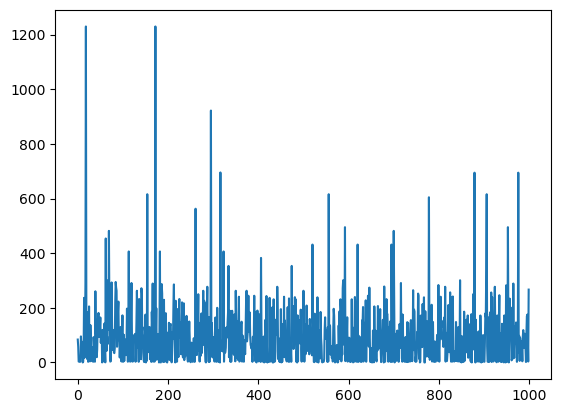

In [55]:
plt.plot(data_1['flow_packets_per_second'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc8eef8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc8eefa850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc8eef8390>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc8eefbd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc8ef00890>],
 'means': []}

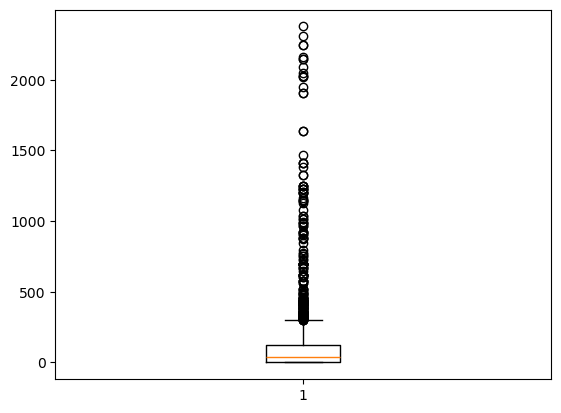

In [76]:
plt.boxplot(x=data_1['flow_packets_per_second'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

## data_2

In [84]:
data_2 = pd.read_csv('dataset_2.csv')

In [85]:
data_2['iat_0'].unique()

array([0.])

In [87]:
data_2 = data_2.drop('iat_0', axis=1)

In [88]:
for i in range(10):
    data_2[f'p_{i}'] = 0
for i in range(10):
    data_2[f'payload_bytes_{i}'] = data_2[f'payload_bytes_{i}'].astype('str')
for i in range(data_2.shape[0]):
    sum = 0
    for j in range(10):
        for s in data_2[f'payload_bytes_{j}'].values[i]:
            if s == '1' or s == '2' or s == '3' or s == '4' or s == '5' or s == '6' or s == '7' or s == '8' or s == '9':
                sum += int(s)
            elif s == 'a' and data_2[f'payload_bytes_{j}'].values[i] != 'nan':
                sum += 10
            elif s == 'b':
                sum += 11
            elif s == 'c':
                sum += 12
            elif s == 'd':
                sum += 13
            elif s == 'e':
                sum += 14
            elif s == 'f':
                sum += 15
        data_2[f'p_{j}'].values[i] = sum

In [90]:
for i in range(10):
    data_2.drop(columns = [f'payload_bytes_{i}'], inplace = True)

In [91]:
data_2['direction_len_0'] = data_2['direction_0'] * data_2['pkt_len_0']
data_2['direction_len_1'] = data_2['direction_1'] * data_2['pkt_len_1']
data_2['direction_len_2'] = data_2['direction_2'] * data_2['pkt_len_2']
data_2['direction_len_3'] = data_2['direction_3'] * data_2['pkt_len_3']
data_2['direction_len_4'] = data_2['direction_4'] * data_2['pkt_len_4']
data_2['direction_len_5'] = data_2['direction_5'] * data_2['pkt_len_5']
data_2['direction_len_6'] = data_2['direction_6'] * data_2['pkt_len_6']
data_2['direction_len_7'] = data_2['direction_7'] * data_2['pkt_len_7']
data_2['direction_len_8'] = data_2['direction_8'] * data_2['pkt_len_8']
data_2['direction_len_9'] = data_2['direction_9'] * data_2['pkt_len_9']

data_2.drop(columns=['direction_0','direction_1','direction_2','direction_3','direction_4','direction_5','direction_6','direction_7','direction_8','direction_9'], inplace=True)
data_2.drop(columns=['pkt_len_0','pkt_len_1','pkt_len_2','pkt_len_3','pkt_len_4','pkt_len_5','pkt_len_6','pkt_len_7','pkt_len_8','pkt_len_9'], inplace=True)

In [92]:
data_2

Unnamed: 0     iat_1        iat_2     iat_3         iat_4     iat_5  \
0             0  0.000084     0.139518  0.000000  27966.147164  0.071334   
1             1  0.004320  1124.975842  0.004588    184.987556  0.004601   
2             2  0.015607     0.025176  0.000094      0.000006  0.018912   
3             3  0.272080     0.003244  0.272398      0.000031  0.301106   
4             4  0.004152     0.000056  0.000011      0.000008  0.004934   
..          ...       ...          ...       ...           ...       ...   
995         995  0.176660     0.010462  0.027349      0.000523  0.003088   
996         996  0.029229     8.846538  0.013133   1461.673011  0.054310   
997         997  0.001968     0.041871  0.000041      0.000012  0.000009   
998         998  0.165554     9.345131  0.142649   1390.328335  0.153930   
999         999  0.033502     0.003981  0.000838      0.001382  0.012812   

           iat_6     iat_7        iat_8     iat_9  flow_packets_per_second  \
0       0.074981  0.070717     0.047804  0.046616                 0.000358   
1     829.089040  0.004063    99.978073  0.004355                 0.004466   
2       0.000023  0.025086     0.040076  0.021919                68.073879   
3       0.539201  0.193189     0.238273  0.153496                 5.068378   
4       0.000643  0.002827     0.071958  0.652287                13.570804   
..           ...       ...          ...       ...                      ...   
995     0.006557  0.097870     0.053721  0.000070                26.574535   
996  1555.047215  0.012250  1220.069632  0.026167                 0.002355   
997     0.001912  0.000208     0.002390  0.041416               111.325027   
998    21.858751  0.153695  1458.832550  0.164151                 0.003471   
999     0.000078  0.005082     0.000129  0.000073               172.780728   

      p_0    p_1    p_2    p_3    p_4    p_5    p_6    p_7    p_8    p_9  \
0    1203   2376   3504   4613   5842   7008   8148   9275  10422  11624   
1    1290   2668   3923   5243   6534   7870   9170  10490  11749  13069   
2    3460  11037  25405  27203  27637  35221  35735  36078  39421  40118   
3    1257   2482   3732   5025   6318   7611   8875  10168  11399  12692   
4    1139   9103   9464   9818  10500  11107  11786  12251  12822  20869   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  1246   3380  19623  21357  25503  25960  26584  27038  45214  63583   
996  1255   2620   3916   5281   6043   6858   8134   9456  10220  11047   
997  1169   8759  16226  16607  16991  17684  18257  18912  19257  19647   
998  1267   2661   3966   4836   6091   7496   8801   9662  10927  12298   
999  2350   3552   4042  15457  20989  35427  37246  37753  38238  38631   

     direction_len_0  direction_len_1  direction_len_2  direction_len_3  \
0                111              111              -96              -96   
1                111             -297              114             -327   
2                247             -523              974              129   
3                112              112              112             -325   
4                 89             -541              -32              -32   
..               ...              ...              ...              ...   
995               88             -160            -1124              120   
996              112             -318              112             -318   
997               87              504             -493              -32   
998              114            -1137              233              -78   
999              161              -81              -40             -764   

     direction_len_4  direction_len_5  direction_len_6  direction_len_7  \
0                111              111              -96              -96   
1                114             -327              114             -327   
2                 35             -517              -39               33   
3               -325             -325    

## data_all 

In [93]:
data_all = pd.read_csv('dataset_all.csv')


In [95]:
data_all['iat_0'].unique()

array([0.])

In [96]:
data_all = data_all.drop('iat_0', axis=1)

In [98]:
for i in range(10):
    data_all[f'p_{i}'] = 0
for i in range(10):
    data_all[f'payload_bytes_{i}'] = data_all[f'payload_bytes_{i}'].astype('str')
for i in range(data_all.shape[0]):
    sum = 0
    for j in range(10):
        for s in data_all[f'payload_bytes_{j}'].values[i]:
            if s == '1' or s == '2' or s == '3' or s == '4' or s == '5' or s == '6' or s == '7' or s == '8' or s == '9':
                sum += int(s)
            elif s == 'a' and data_all[f'payload_bytes_{j}'].values[i] != 'nan':
                sum += 10
            elif s == 'b':
                sum += 11
            elif s == 'c':
                sum += 12
            elif s == 'd':
                sum += 13
            elif s == 'e':
                sum += 14
            elif s == 'f':
                sum += 15
        data_all[f'p_{j}'].values[i] = sum

In [99]:
for i in range(10):
    data_all.drop(columns = [f'payload_bytes_{i}'], inplace = True)

In [100]:
data_all['direction_len_0'] = data_all['direction_0'] * data_all['pkt_len_0']
data_all['direction_len_1'] = data_all['direction_1'] * data_all['pkt_len_1']
data_all['direction_len_2'] = data_all['direction_2'] * data_all['pkt_len_2']
data_all['direction_len_3'] = data_all['direction_3'] * data_all['pkt_len_3']
data_all['direction_len_4'] = data_all['direction_4'] * data_all['pkt_len_4']
data_all['direction_len_5'] = data_all['direction_5'] * data_all['pkt_len_5']
data_all['direction_len_6'] = data_all['direction_6'] * data_all['pkt_len_6']
data_all['direction_len_7'] = data_all['direction_7'] * data_all['pkt_len_7']
data_all['direction_len_8'] = data_all['direction_8'] * data_all['pkt_len_8']
data_all['direction_len_9'] = data_all['direction_9'] * data_all['pkt_len_9']

data_all.drop(columns=['direction_0','direction_1','direction_2','direction_3','direction_4','direction_5','direction_6','direction_7','direction_8','direction_9'], inplace=True)
data_all.drop(columns=['pkt_len_0','pkt_len_1','pkt_len_2','pkt_len_3','pkt_len_4','pkt_len_5','pkt_len_6','pkt_len_7','pkt_len_8','pkt_len_9'], inplace=True)

In [101]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1996 non-null   int64  
 1   iat_1                    1996 non-null   float64
 2   iat_2                    1996 non-null   float64
 3   iat_3                    1996 non-null   float64
 4   iat_4                    1996 non-null   float64
 5   iat_5                    1996 non-null   float64
 6   iat_6                    1996 non-null   float64
 7   iat_7                    1996 non-null   float64
 8   iat_8                    1996 non-null   float64
 9   iat_9                    1996 non-null   float64
 10  flow_packets_per_second  1996 non-null   float64
 11  p_0                      1996 non-null   int64  
 12  p_1                      1996 non-null   int64  
 13  p_2                      1996 non-null   int64  
 14  p_3                     